## Linear Regression Analysis
Linear regression is a linear model, e.g. a model that assumes a linear relationship between one or more independent input variables (x) and a dependent single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x)

Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# view all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# load the dataset
auto = pd.read_csv(r'/content/drive/MyDrive/ML - Regression /Automobile price/Automobile_data.csv')

In [4]:
# top 5 records
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
# shape
auto.shape

(205, 26)

In [6]:
auto[auto['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


##### The Null values are represented by ?. I will convert them back to NaN values

In [7]:
# replace '?' and 'nan' with NaN
auto.replace('?', np.NaN,inplace = True)

In [8]:
# null values
auto.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


##### Now the null values are repressented with np.nan

In [9]:
# dtypes and number of unique values
for feature in auto.columns:
    print(feature, ': ', auto[feature].dtypes, ', ', auto[feature].nunique(), ' unique values')

symboling :  int64 ,  6  unique values
normalized-losses :  object ,  51  unique values
make :  object ,  22  unique values
fuel-type :  object ,  2  unique values
aspiration :  object ,  2  unique values
num-of-doors :  object ,  2  unique values
body-style :  object ,  5  unique values
drive-wheels :  object ,  3  unique values
engine-location :  object ,  2  unique values
wheel-base :  float64 ,  53  unique values
length :  float64 ,  75  unique values
width :  float64 ,  44  unique values
height :  float64 ,  49  unique values
curb-weight :  int64 ,  171  unique values
engine-type :  object ,  7  unique values
num-of-cylinders :  object ,  7  unique values
engine-size :  int64 ,  44  unique values
fuel-system :  object ,  8  unique values
bore :  object ,  38  unique values
stroke :  object ,  36  unique values
compression-ratio :  float64 ,  32  unique values
horsepower :  object ,  59  unique values
peak-rpm :  object ,  23  unique values
city-mpg :  int64 ,  29  unique values
hi

In [10]:
# data types
auto.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


#### Some numerical features have an 'object' datatype, I'll have to convert it back to 'int' and 'float'

In [11]:
 for feature in ['symboling', 'normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
        auto[feature] = pd.to_numeric(auto[feature], errors= 'ignore')

<ipython-input-11-ad4dc3067f5c>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  auto[feature] = pd.to_numeric(auto[feature], errors= 'ignore')


## Exploratory Data Analysis

In [12]:
# Numerical Variable dtypes
numericals = ['int64', 'float64']

# Numerical Variable
# 'symboling' is a discrete variable with a 'int64' numerical dtype
num_var = [feature for feature in auto.columns if auto[feature].dtypes in numericals and feature != 'symboling']
num_var

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [13]:
# top 5 records of numerical variable
auto[num_var].head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<Figure size 1200x500 with 0 Axes>

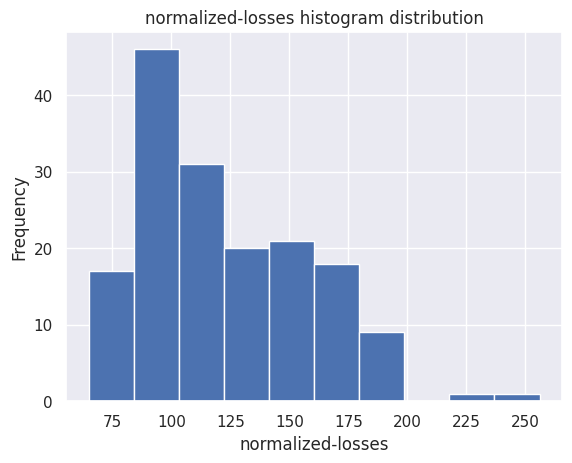

<Figure size 1200x500 with 0 Axes>

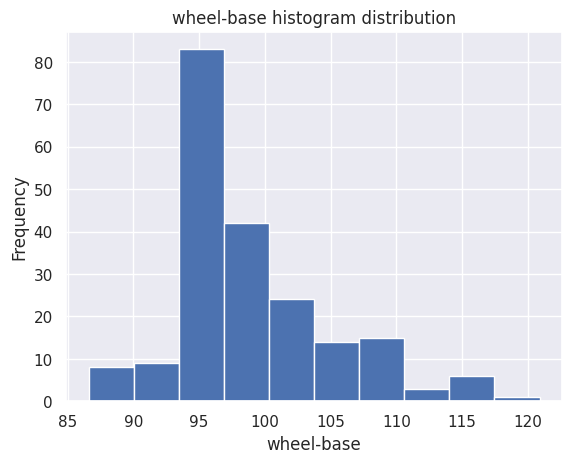

<Figure size 1200x500 with 0 Axes>

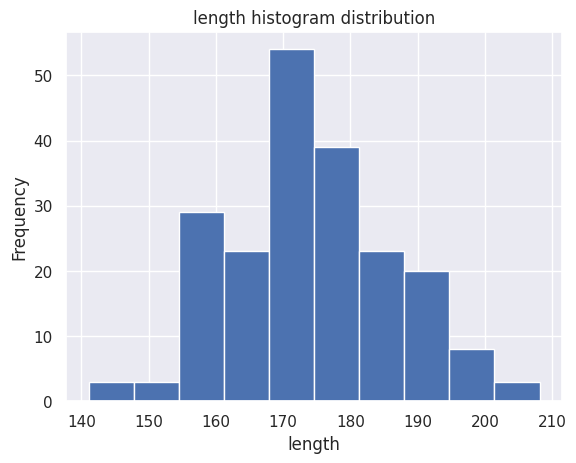

<Figure size 1200x500 with 0 Axes>

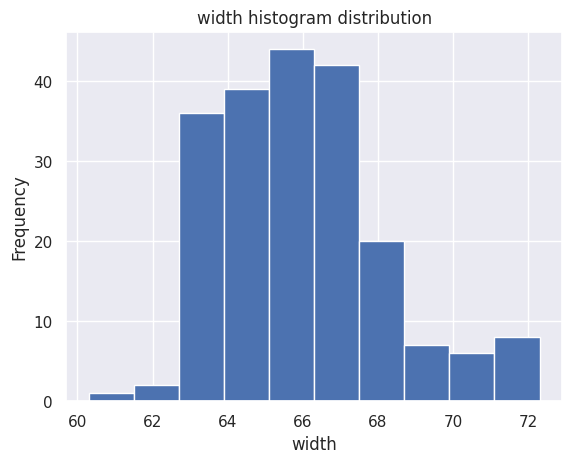

<Figure size 1200x500 with 0 Axes>

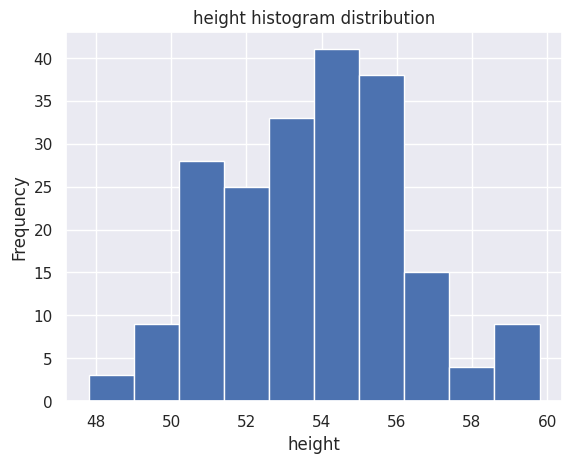

<Figure size 1200x500 with 0 Axes>

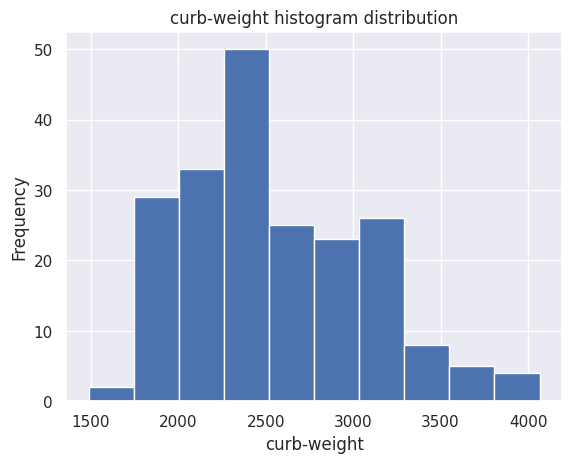

<Figure size 1200x500 with 0 Axes>

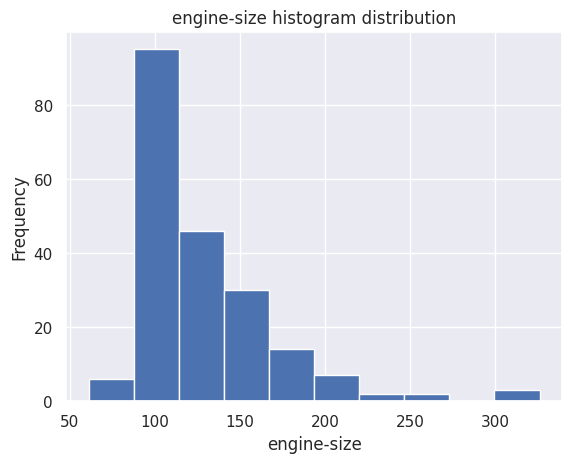

<Figure size 1200x500 with 0 Axes>

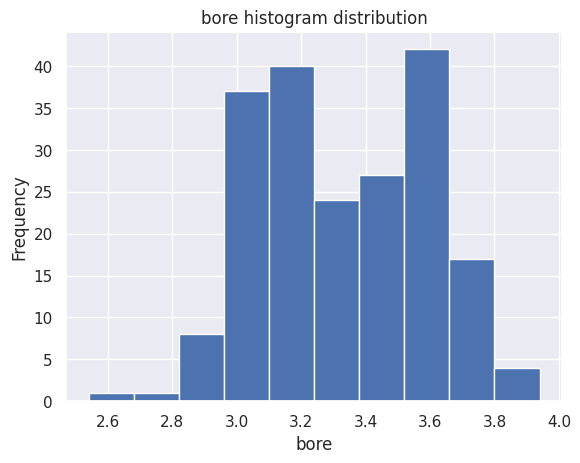

<Figure size 1200x500 with 0 Axes>

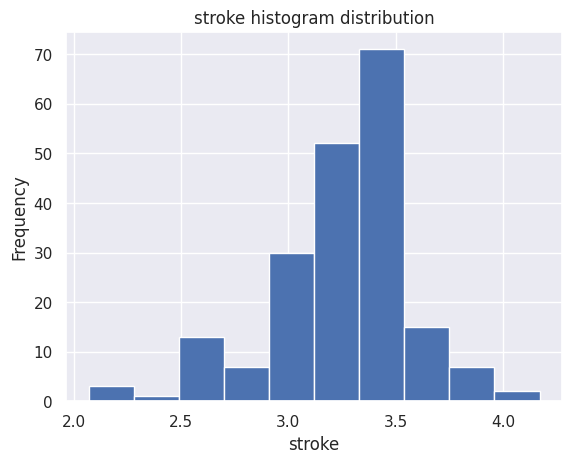

<Figure size 1200x500 with 0 Axes>

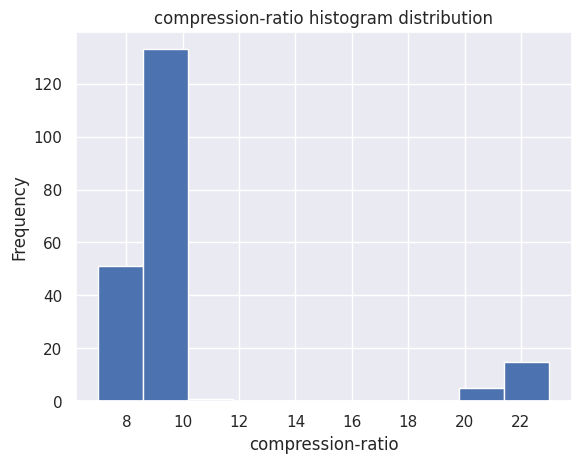

<Figure size 1200x500 with 0 Axes>

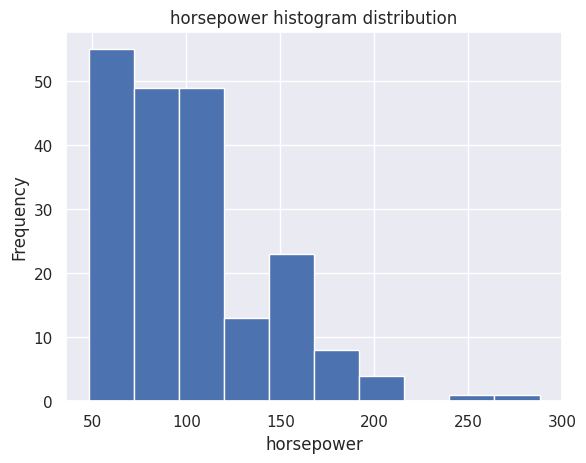

<Figure size 1200x500 with 0 Axes>

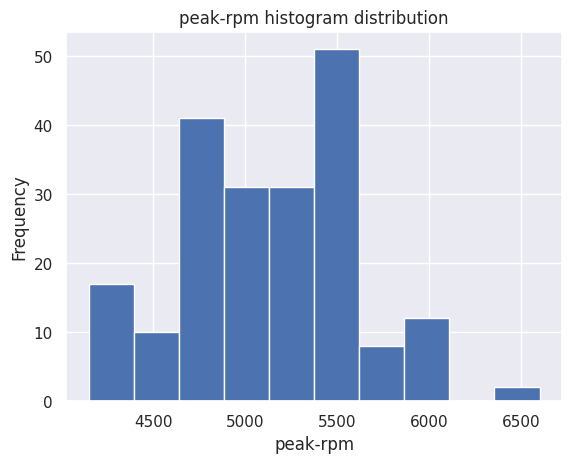

<Figure size 1200x500 with 0 Axes>

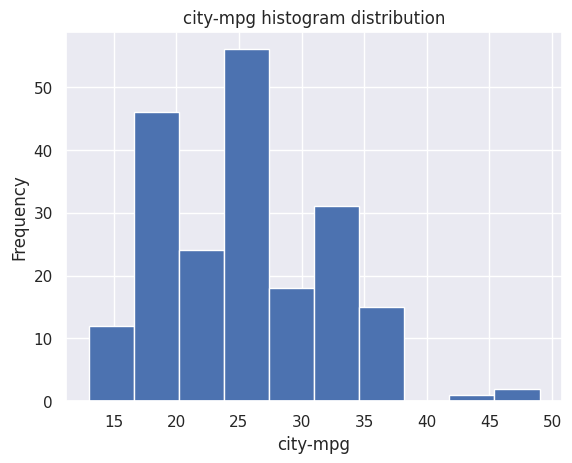

<Figure size 1200x500 with 0 Axes>

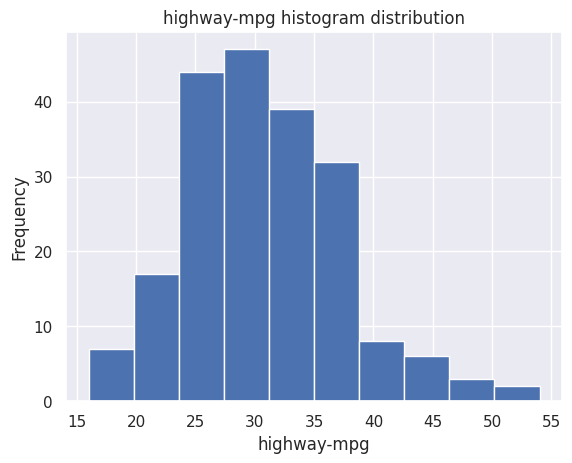

<Figure size 1200x500 with 0 Axes>

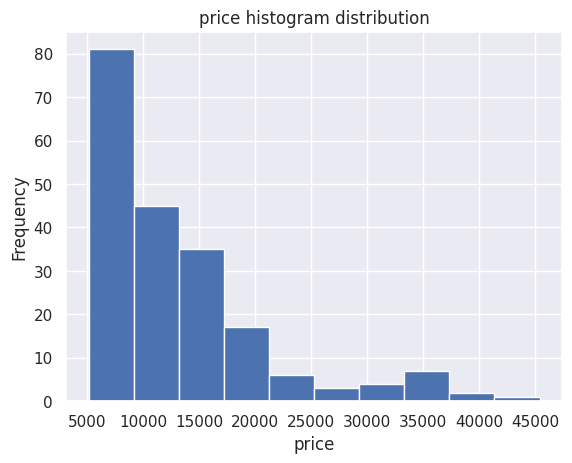

In [14]:
# histogram distribution of numerical variable
for feature in num_var:
    # copy the dataframe
    df=auto.copy()
    plt.figure(figsize=(12, 5))
    df.hist(feature)
    plt.title(feature+' histogram distribution')
    plt.ylabel('Frequency')
    plt.xlabel(feature)
    plt.show()

#### Most of the numerical variables follow a normal distribution



### Relationship of the numerical variable with the target variable

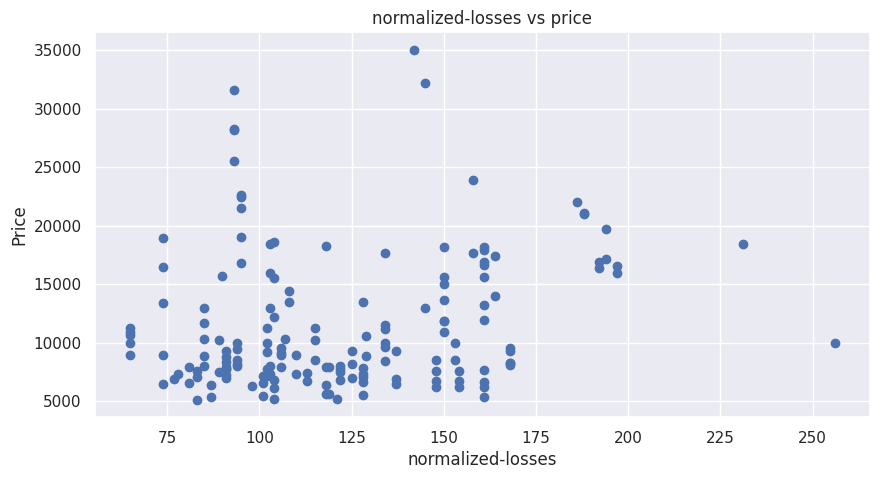

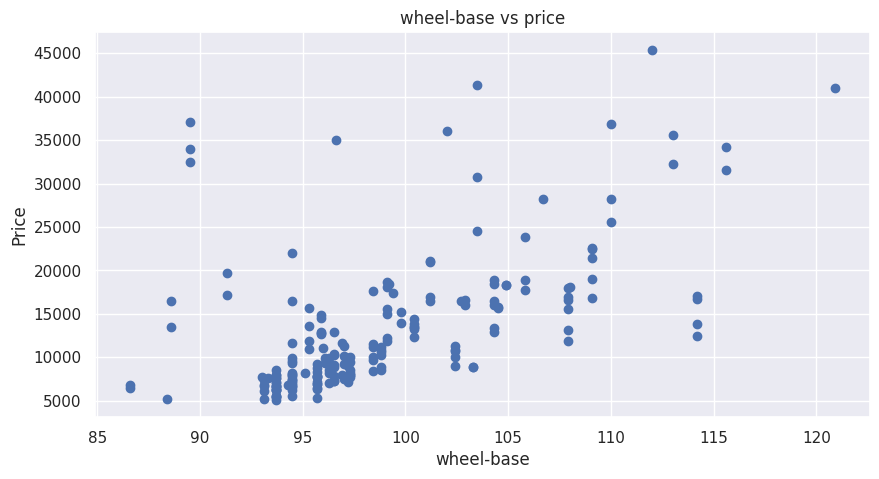

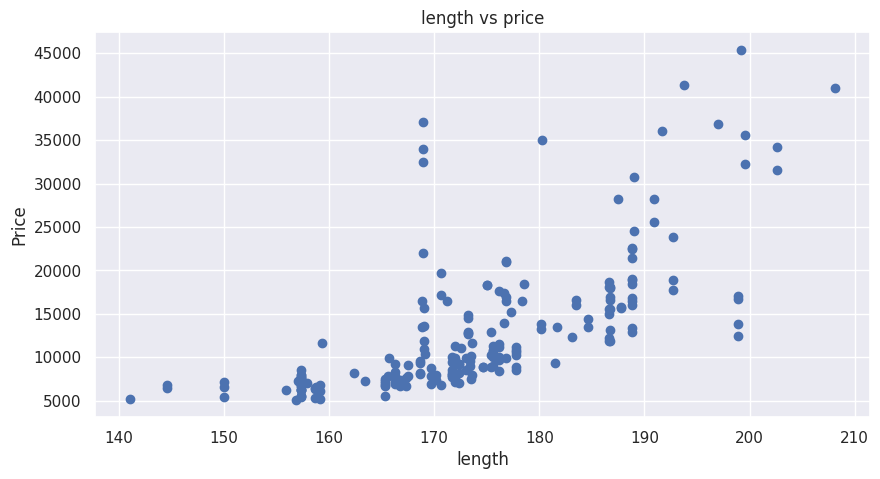

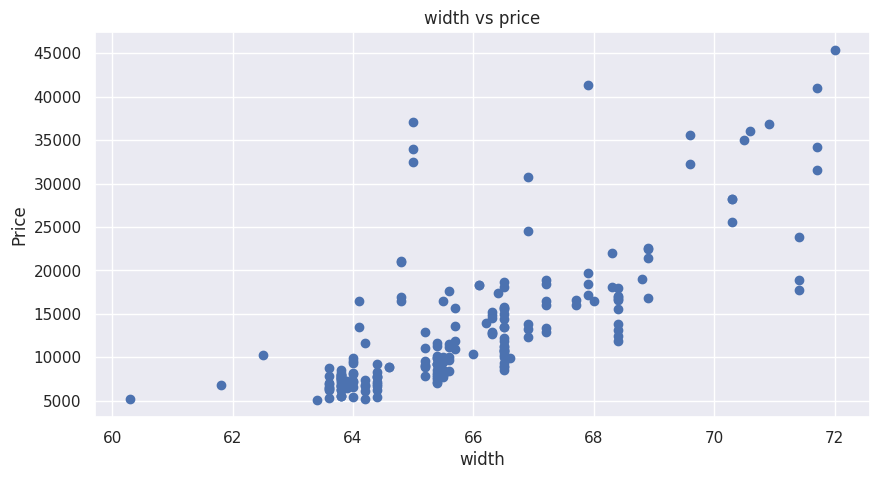

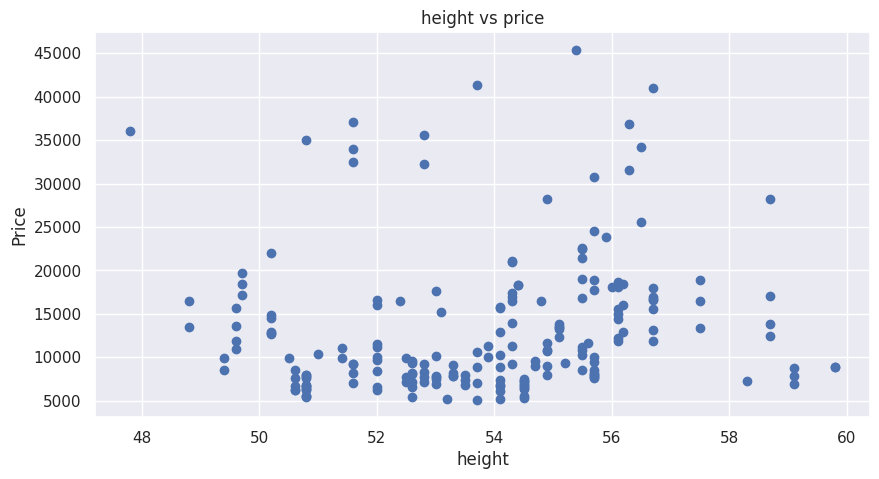

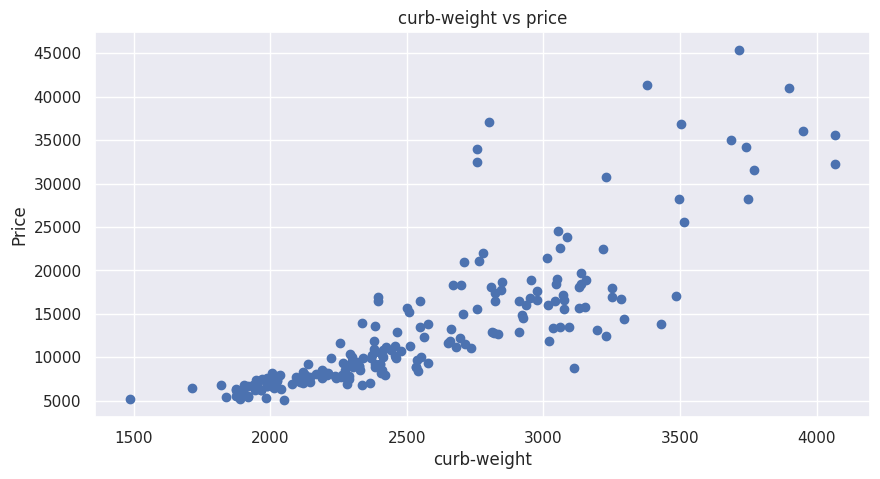

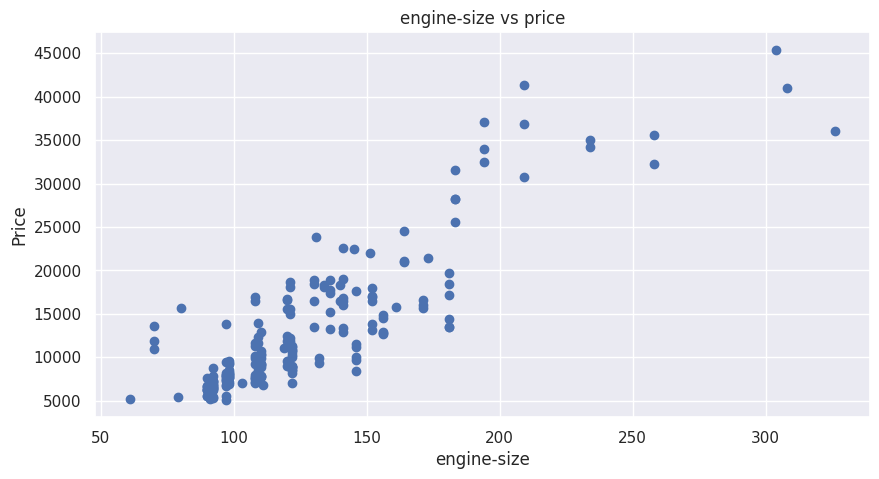

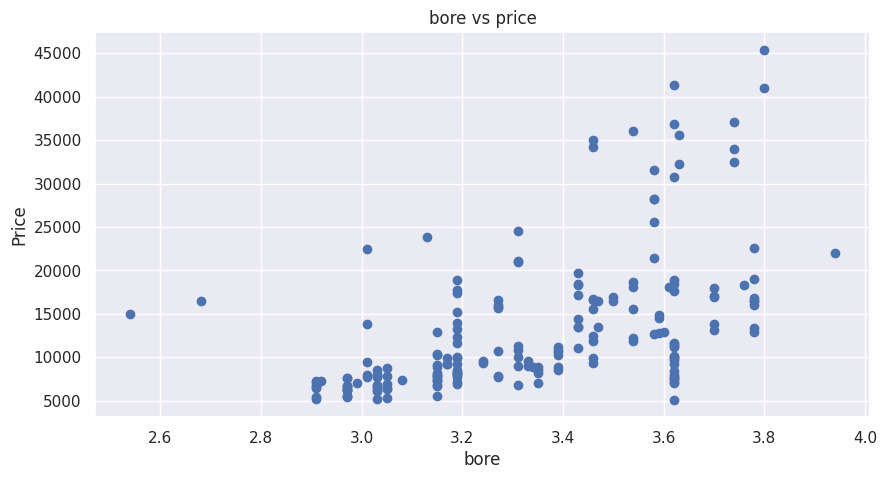

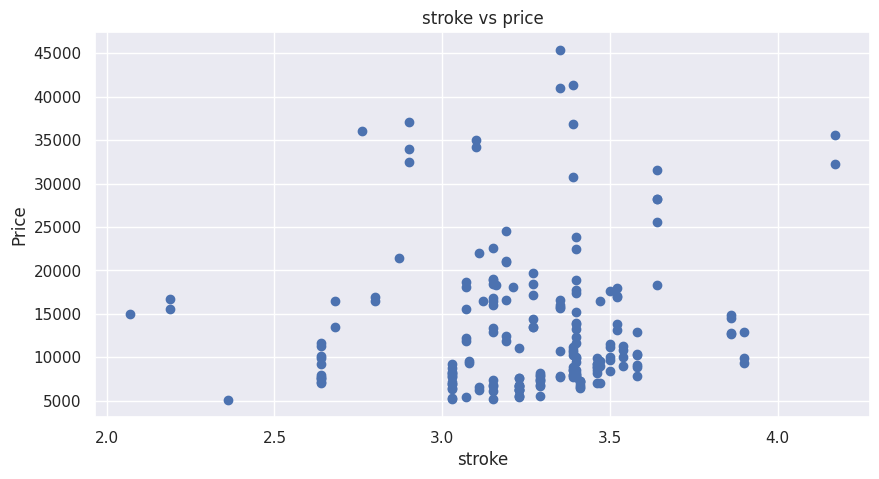

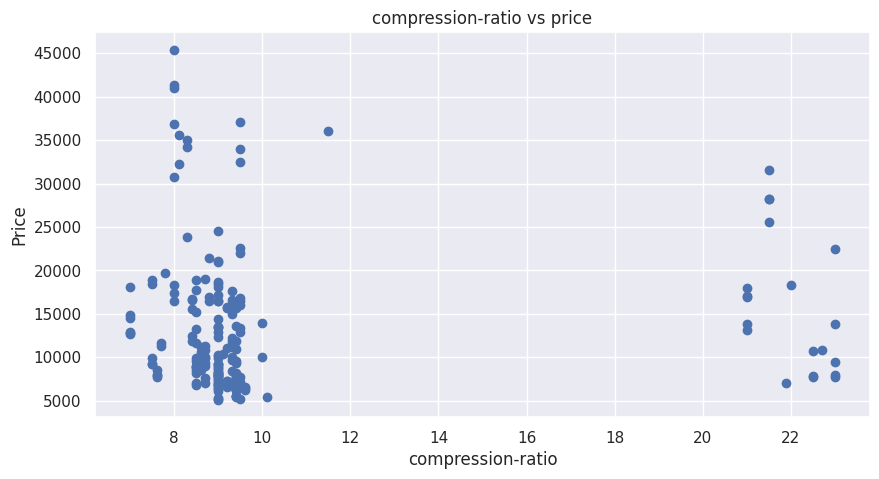

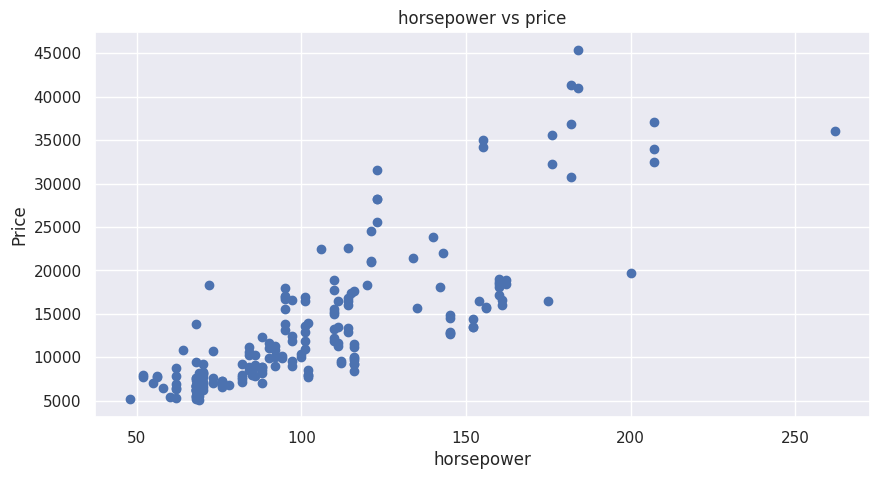

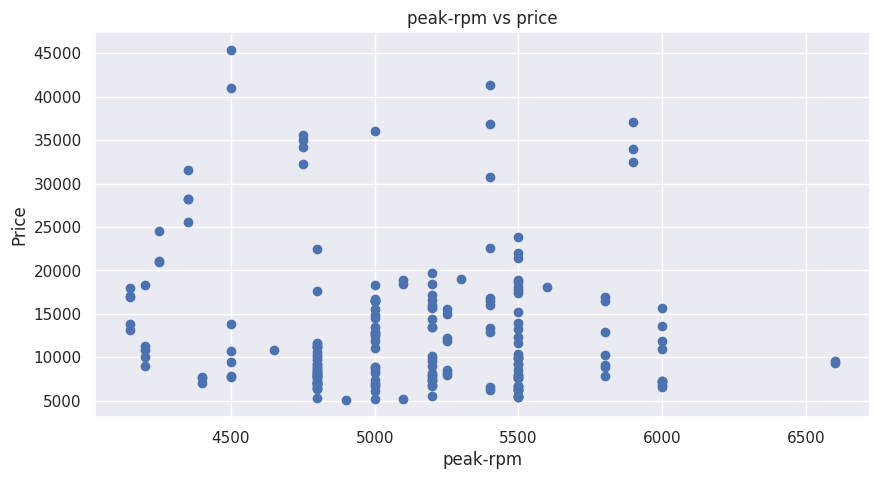

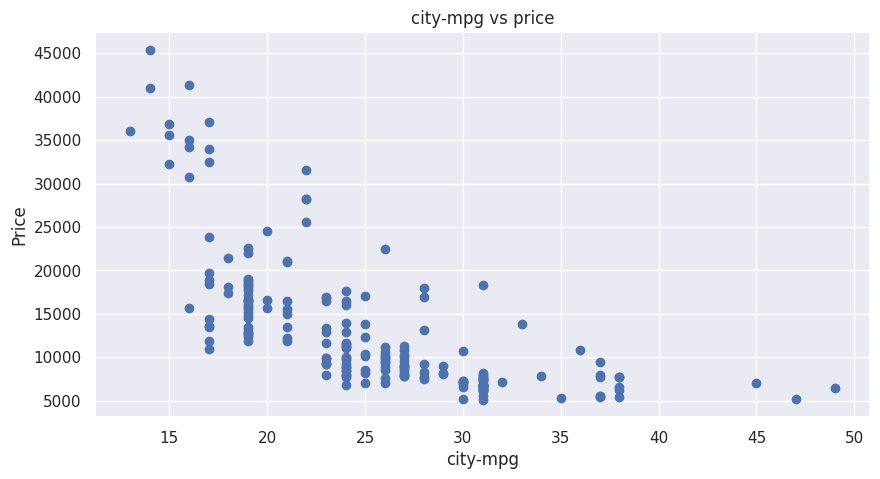

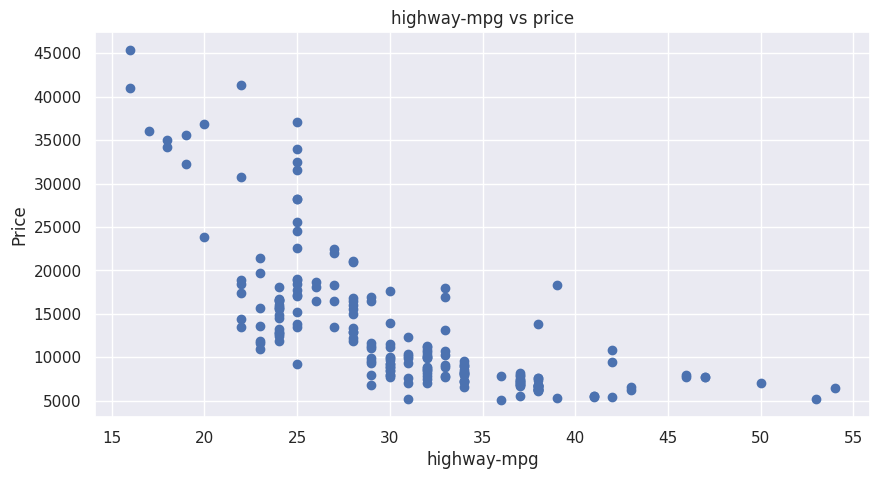

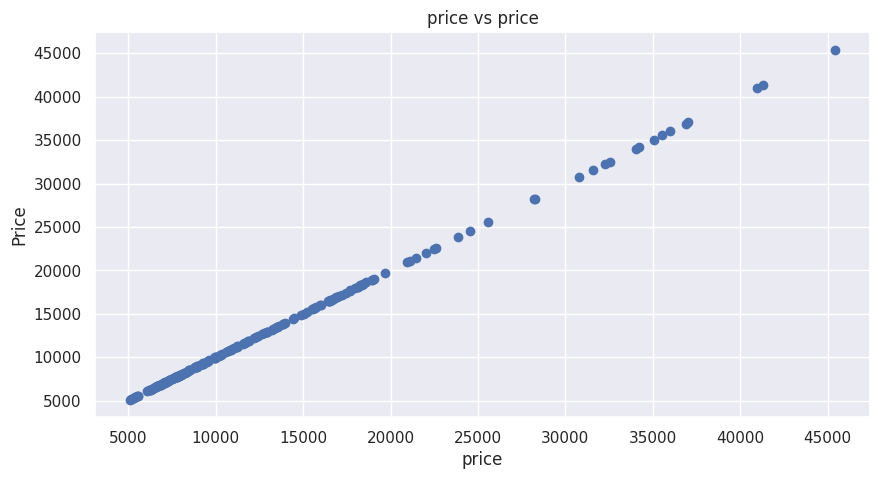

In [15]:
# scatter plots of the numerical variable
for feature in num_var:
    df=auto.copy()
    plt.figure(figsize=(10, 5))
    plt.scatter(df[feature], df['price'])
    plt.title(feature+' vs price')
    plt.ylabel('Price')
    plt.xlabel(feature)
    plt.show()

### Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


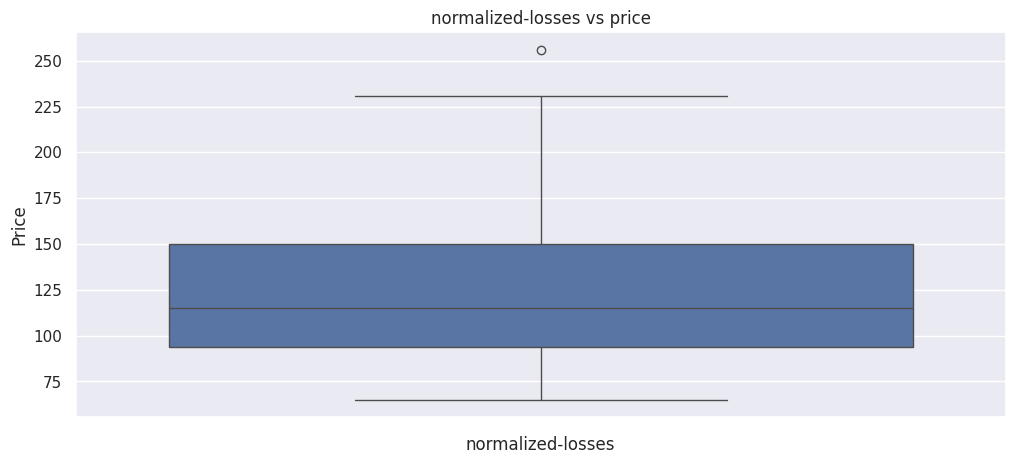

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


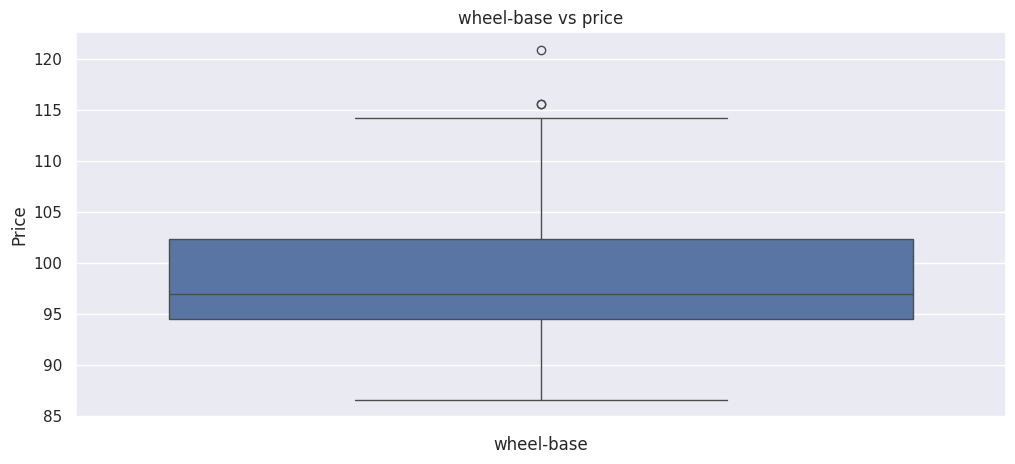

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


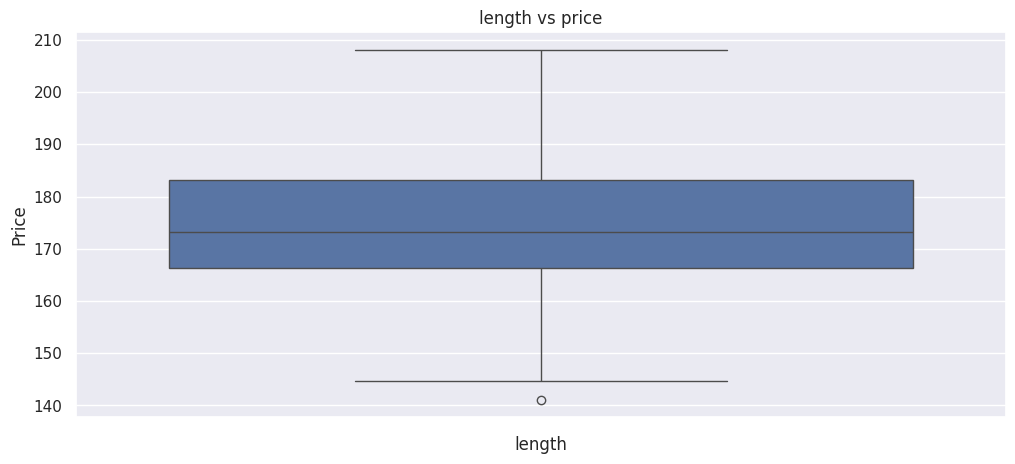

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


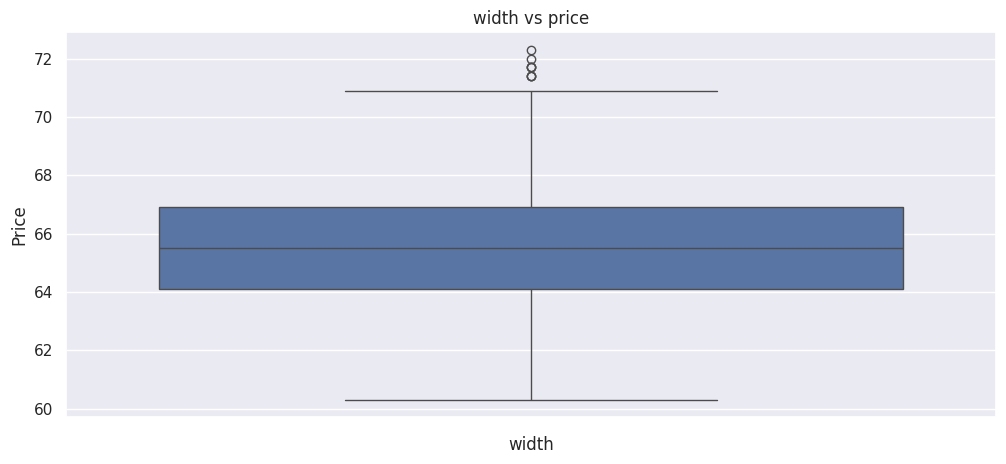

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


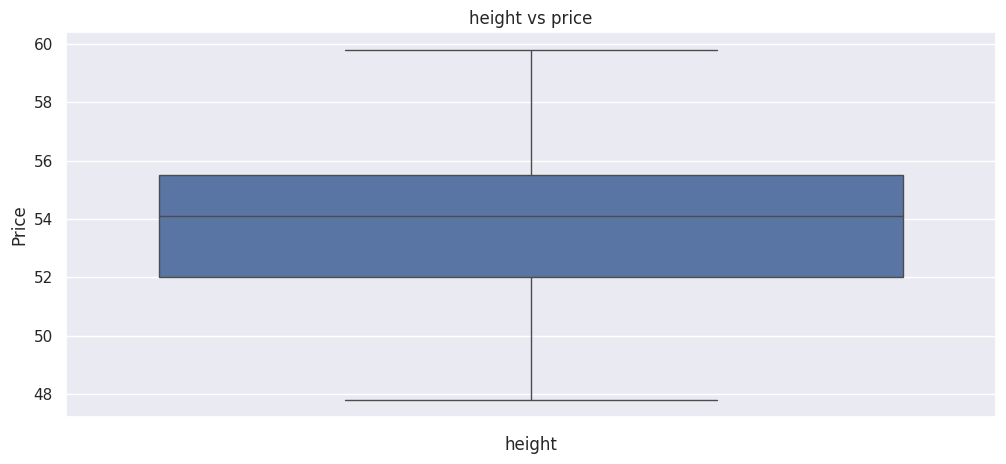

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


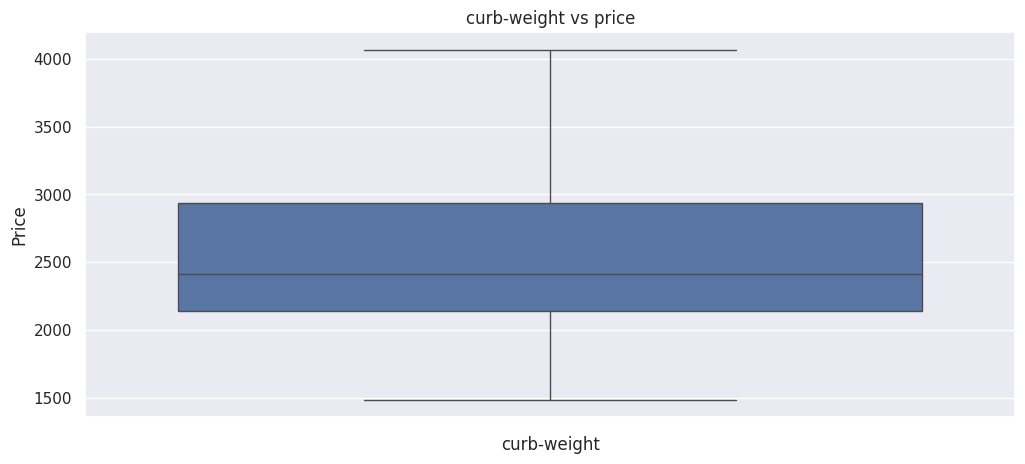

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


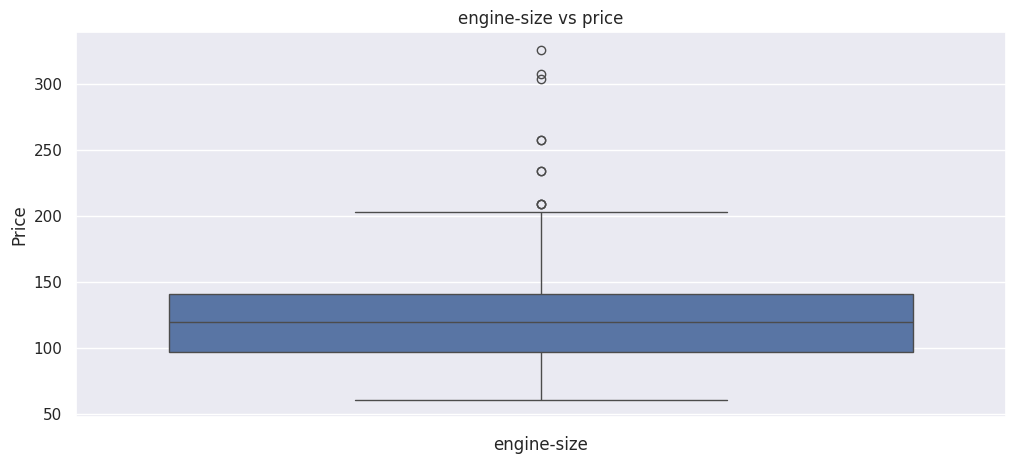

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


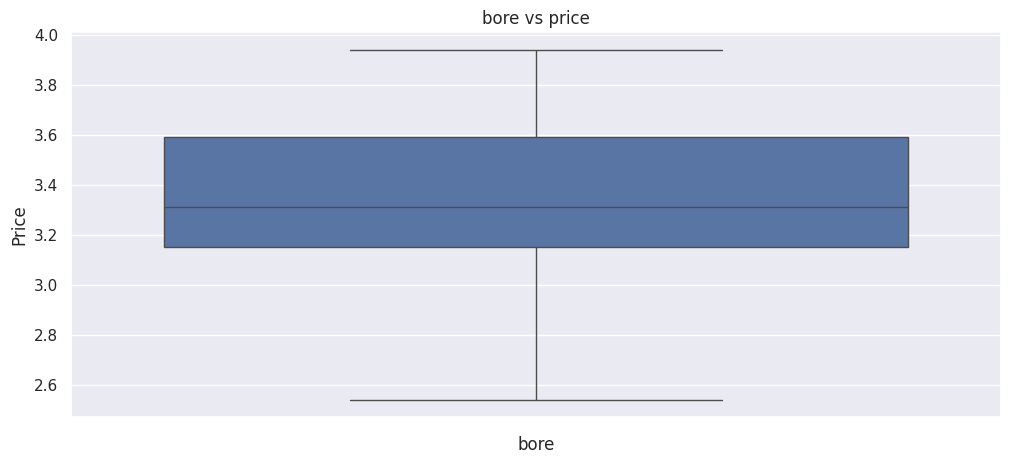

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


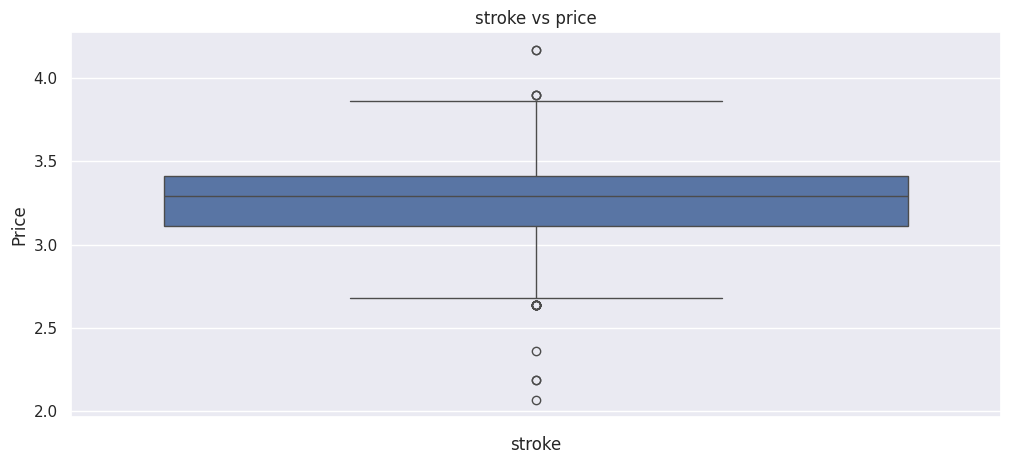

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


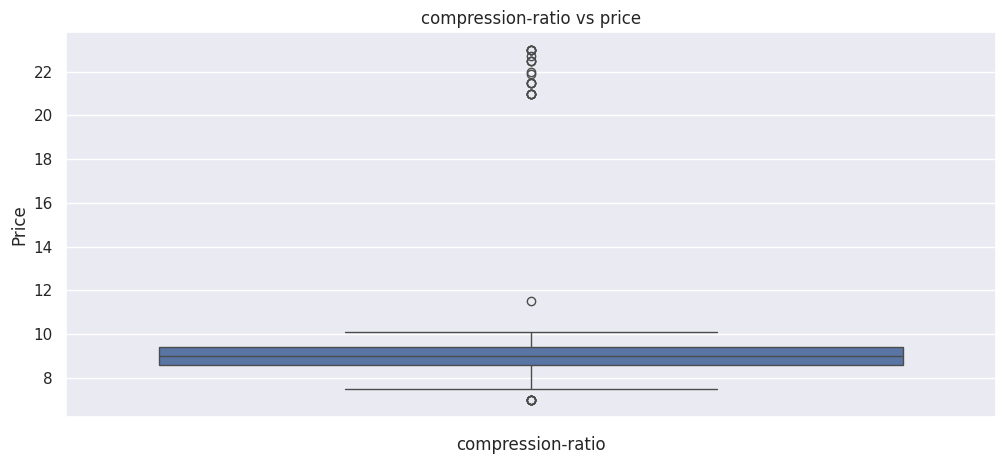

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


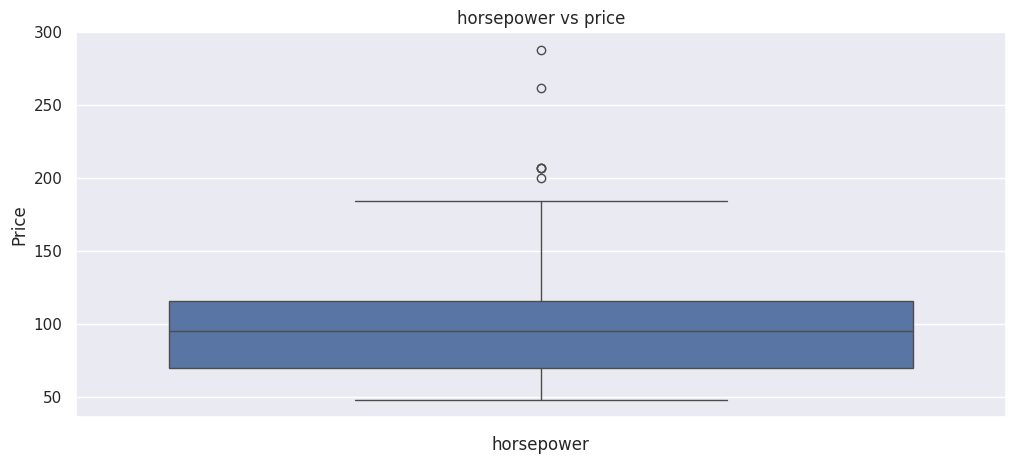

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


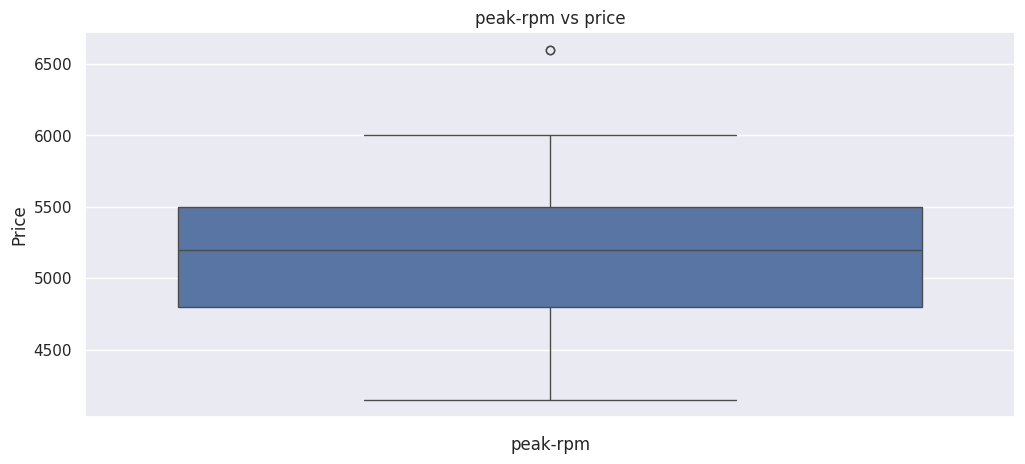

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


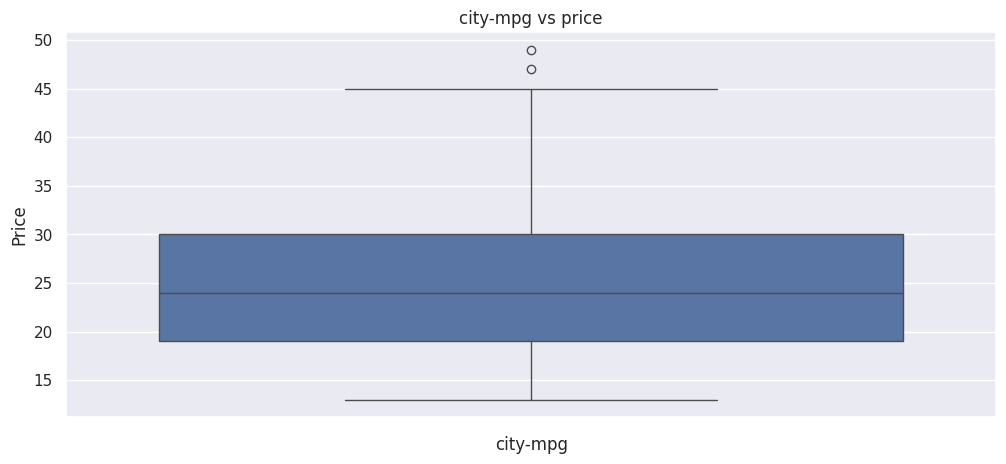

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


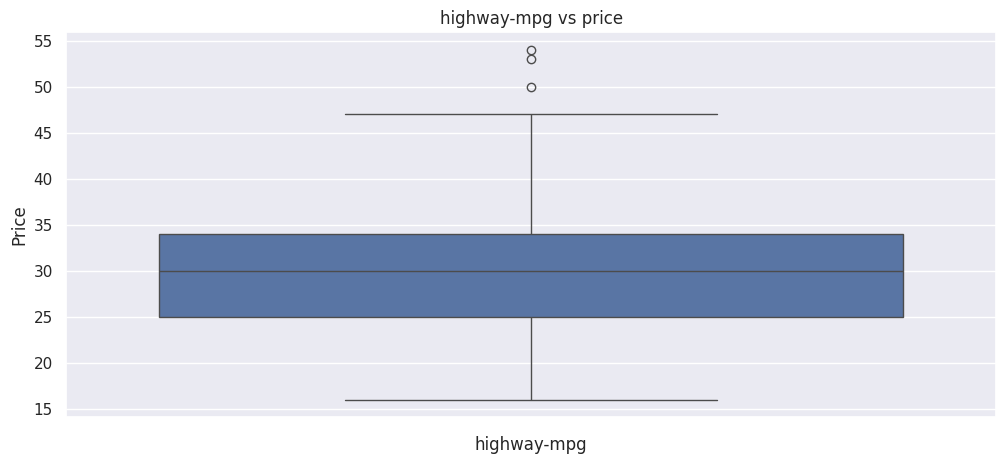

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


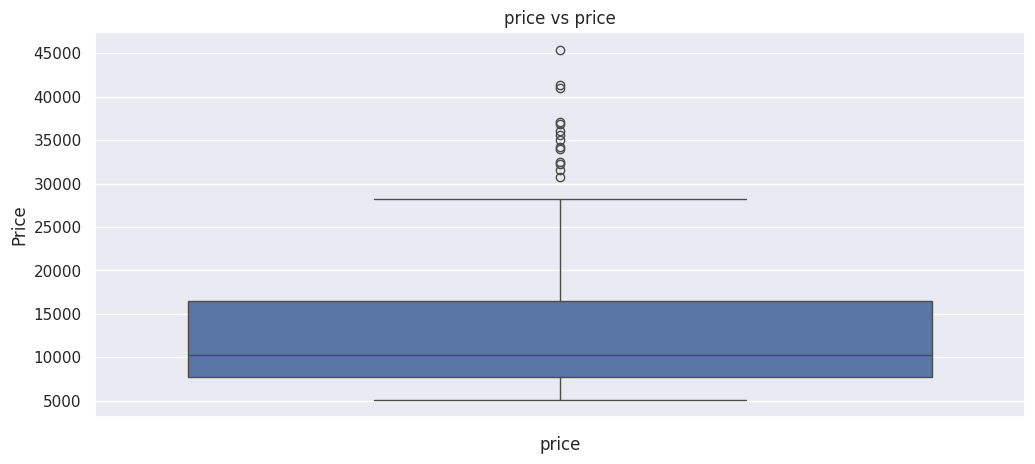

In [16]:
# box plots of numerical variable
for feature in num_var:
    df=auto.copy()
    plt.figure(figsize=(12, 5))
    sns.boxplot(df[feature])
    plt.title(feature+' vs price')
    plt.ylabel('Price')
    plt.xlabel(feature)
    plt.show()

## Categorical Variables

In [17]:
# catgeorical variables
# 'symboling' is a discrete categorical variable with a 'int64' numerical dtype
cat_var = [feature for feature in auto.columns if auto[feature].dtypes == 'O' or feature == 'symboling']
cat_var

['symboling',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

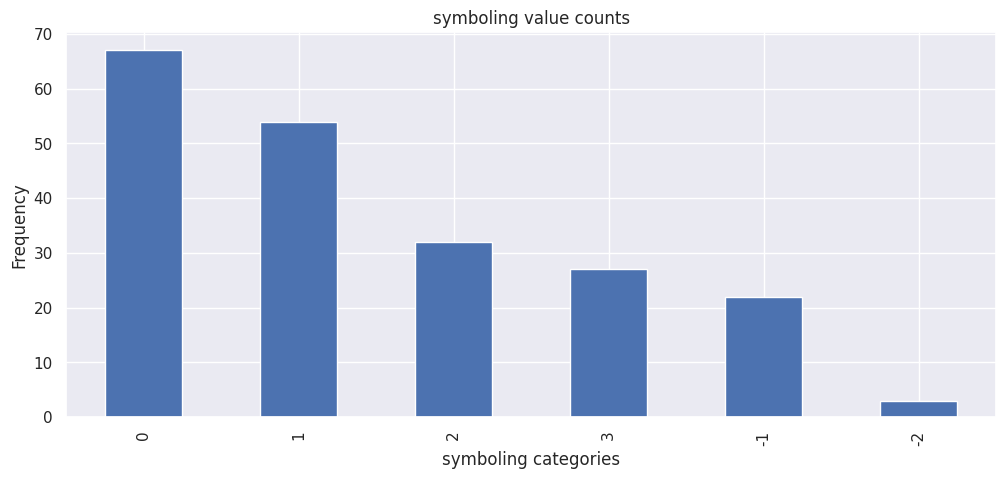

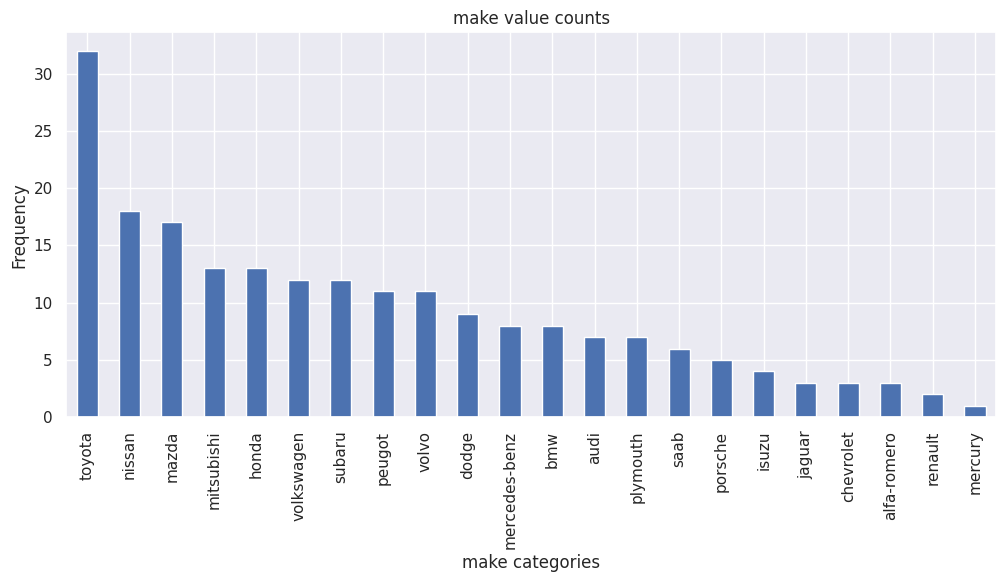

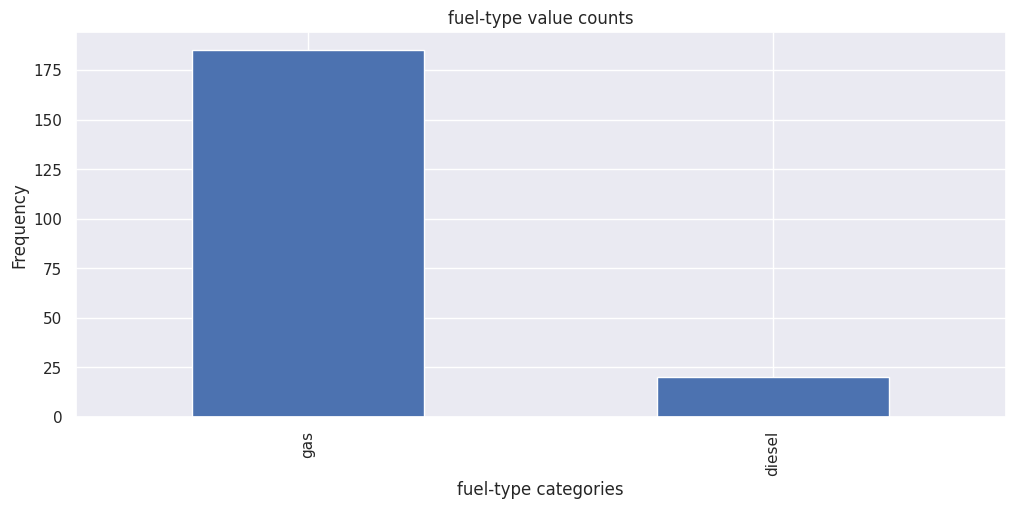

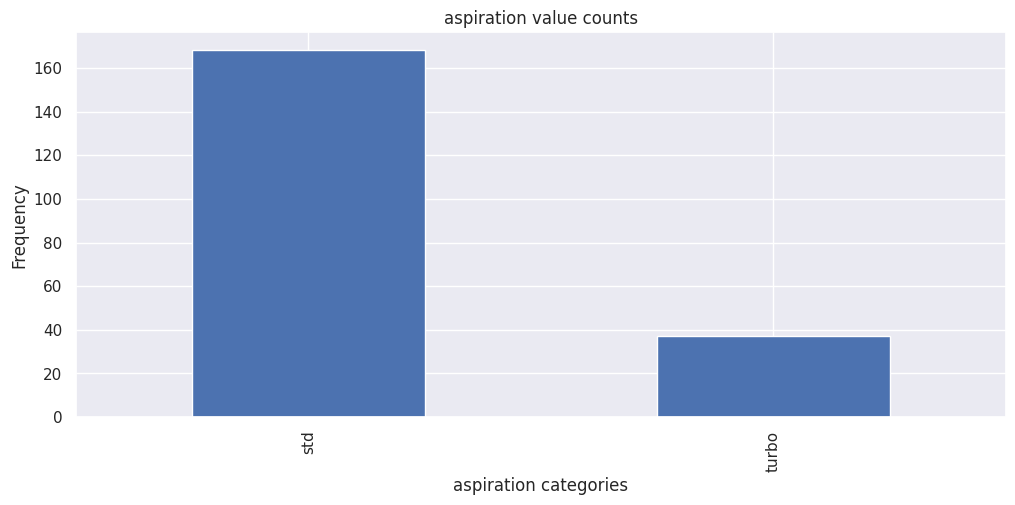

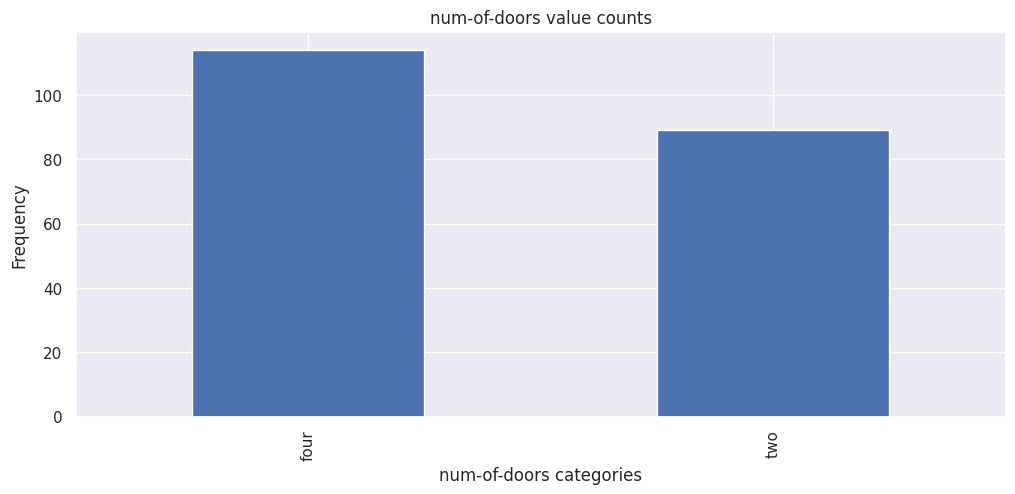

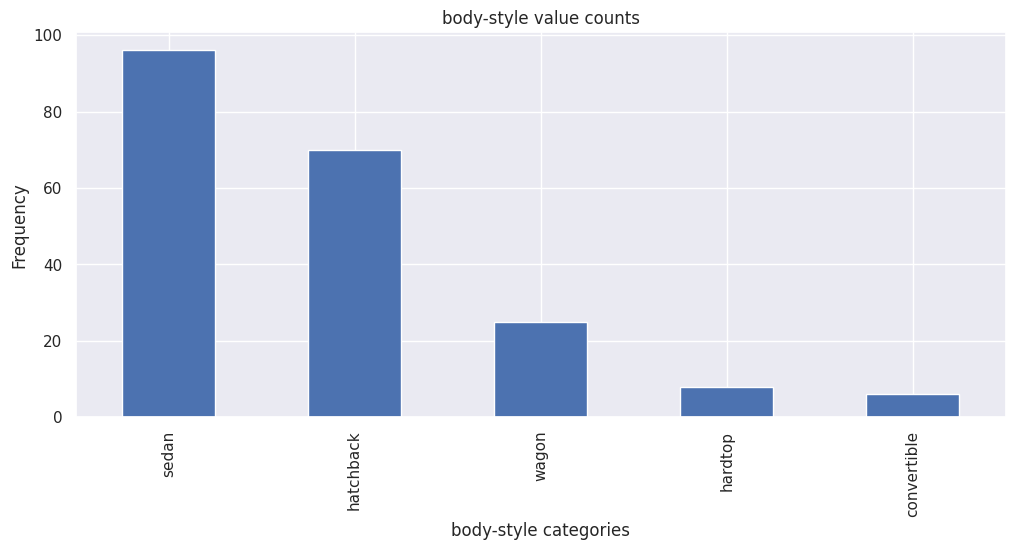

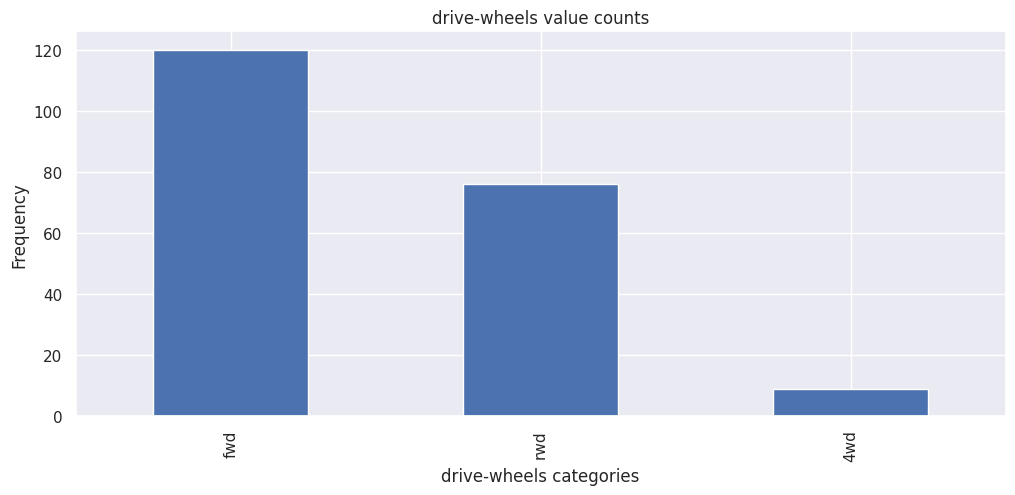

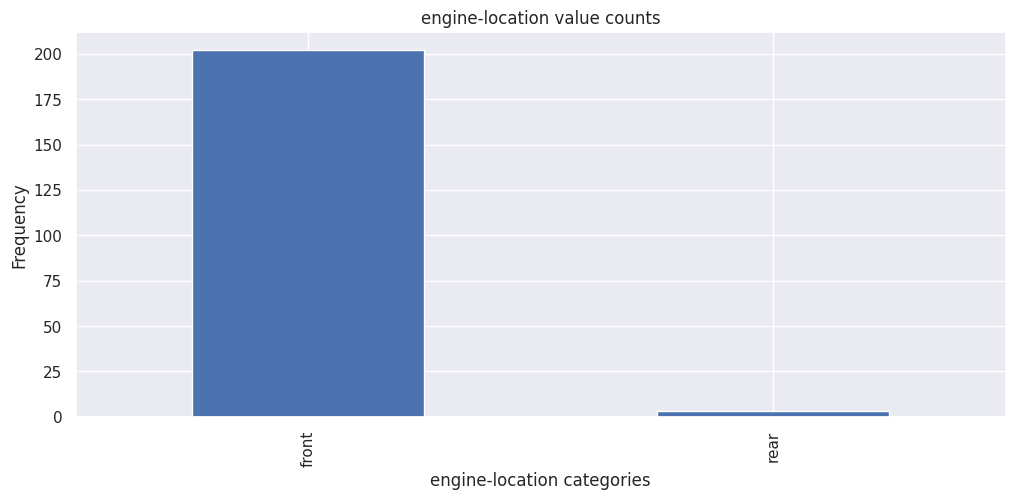

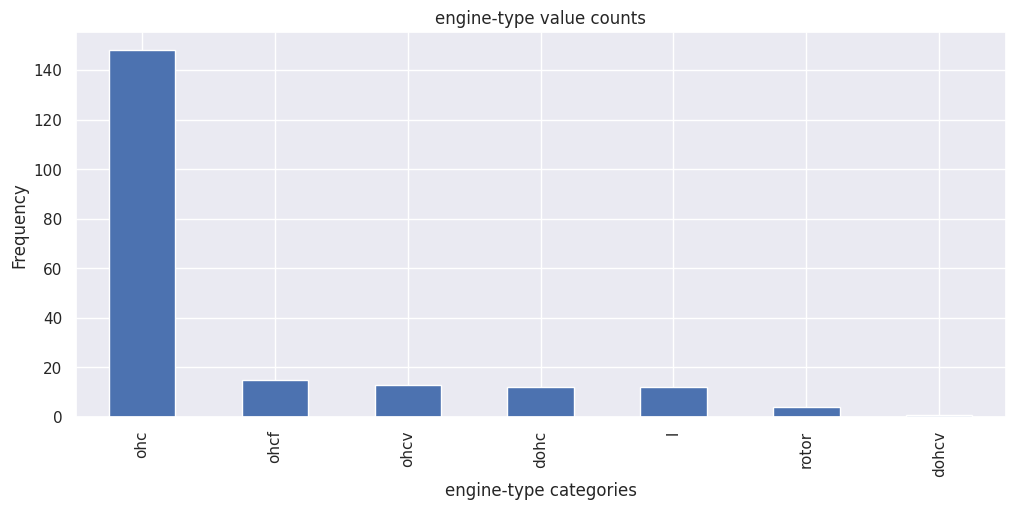

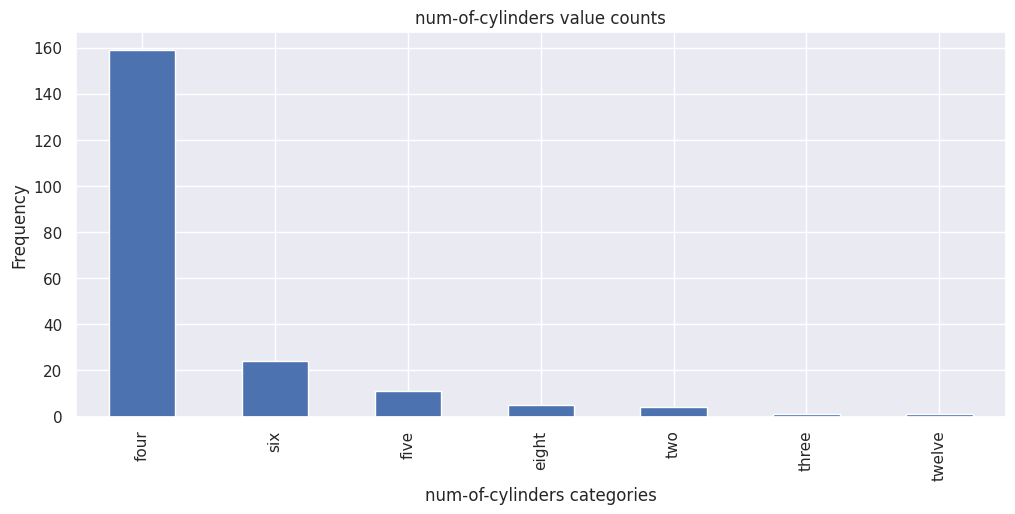

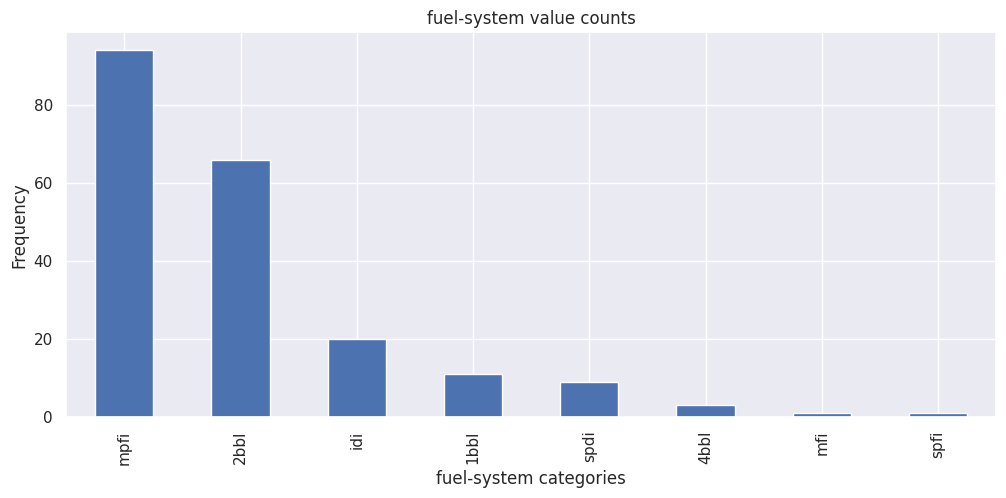

In [18]:
# categorical variables value counts
for feature in cat_var:
    df=auto.copy()
    plt.figure(figsize=(12, 5))
    df[feature].value_counts().plot.bar()
    plt.title(feature+' value counts')
    plt.ylabel('Frequency')
    plt.xlabel(feature+' categories')
    plt.show()

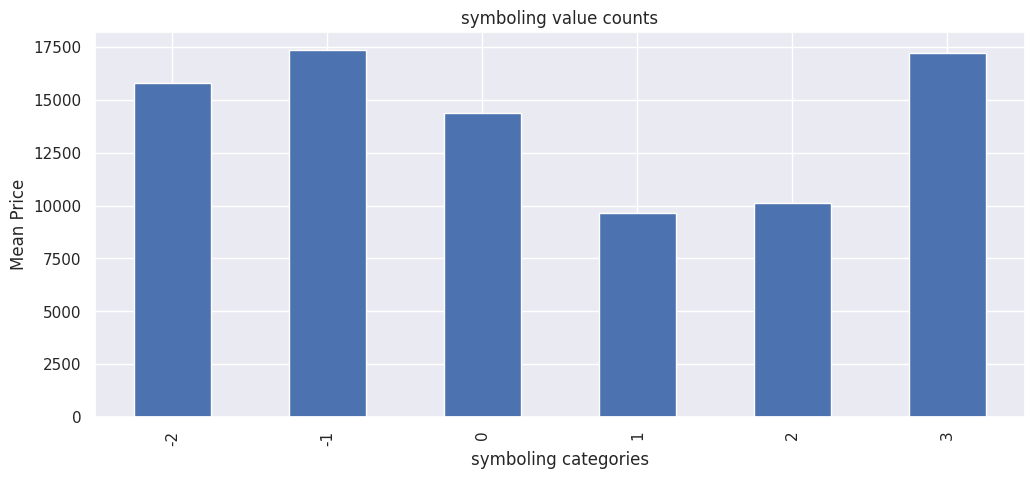

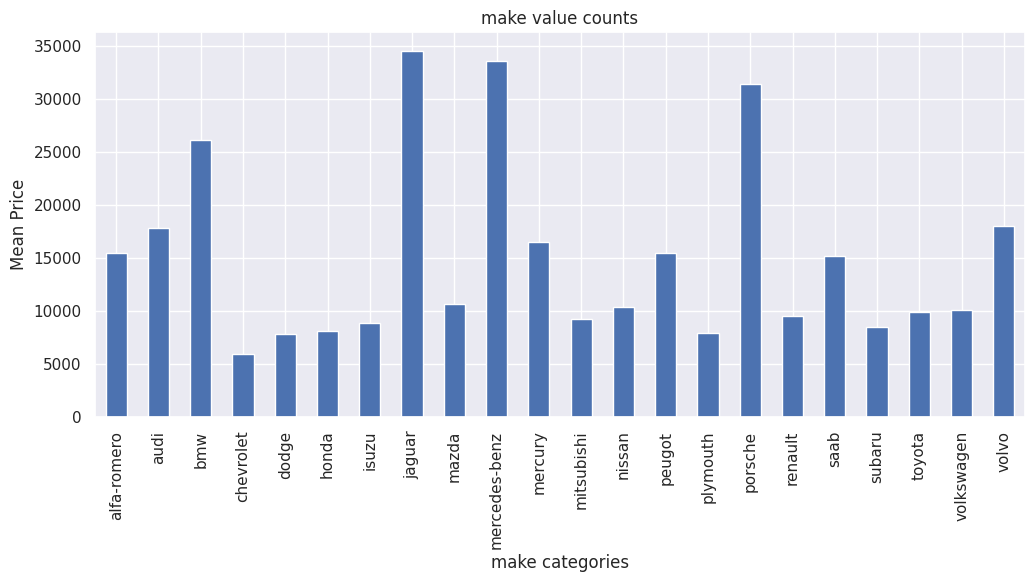

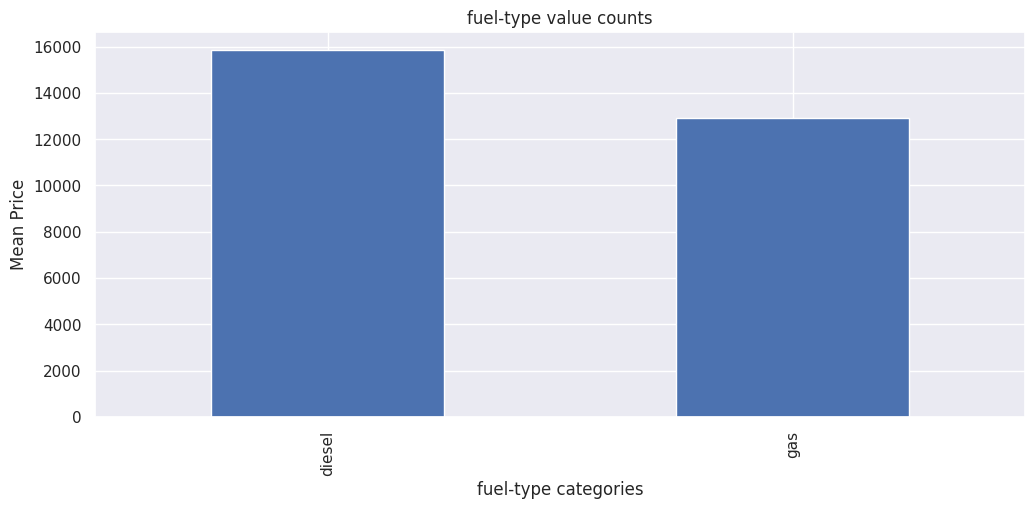

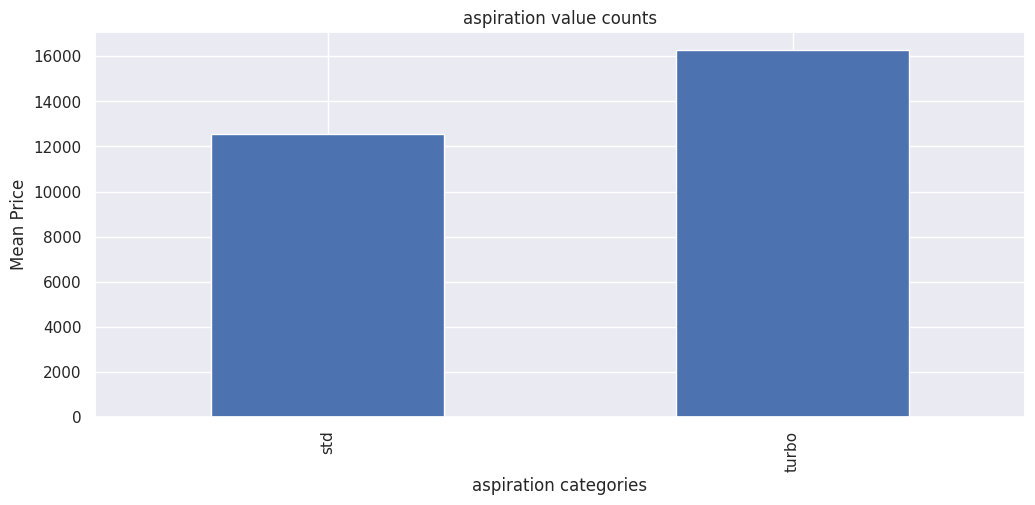

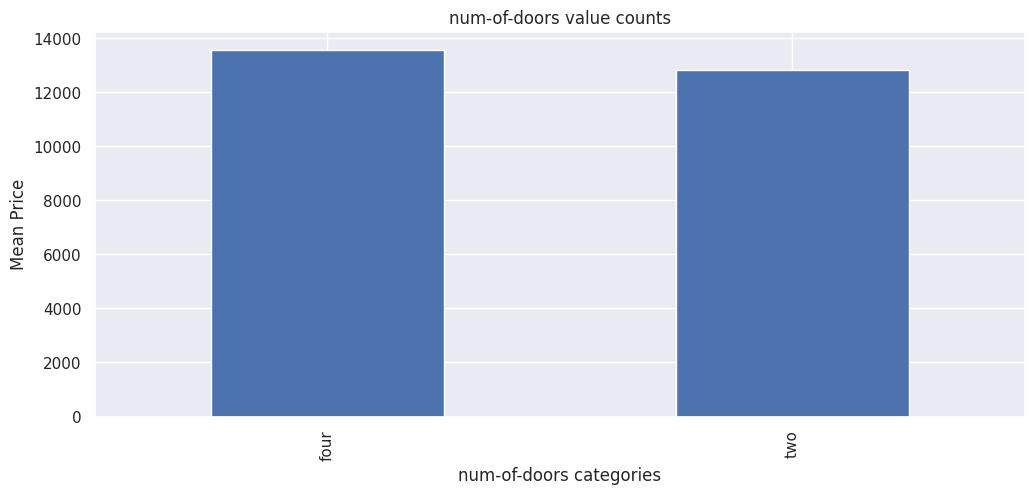

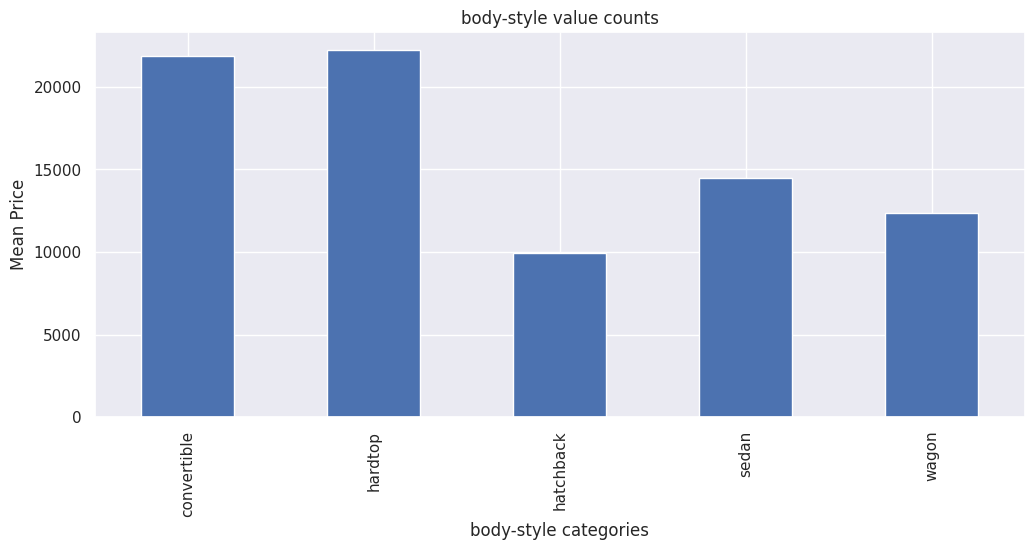

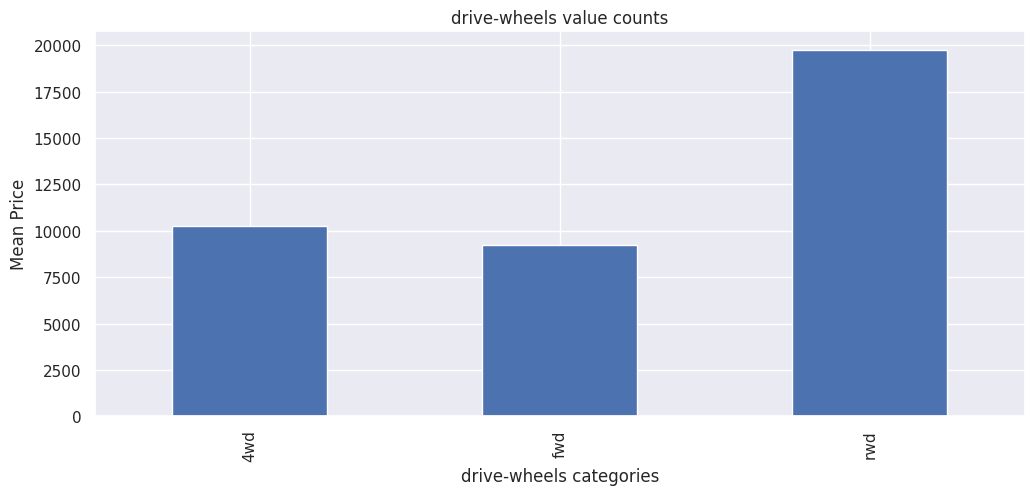

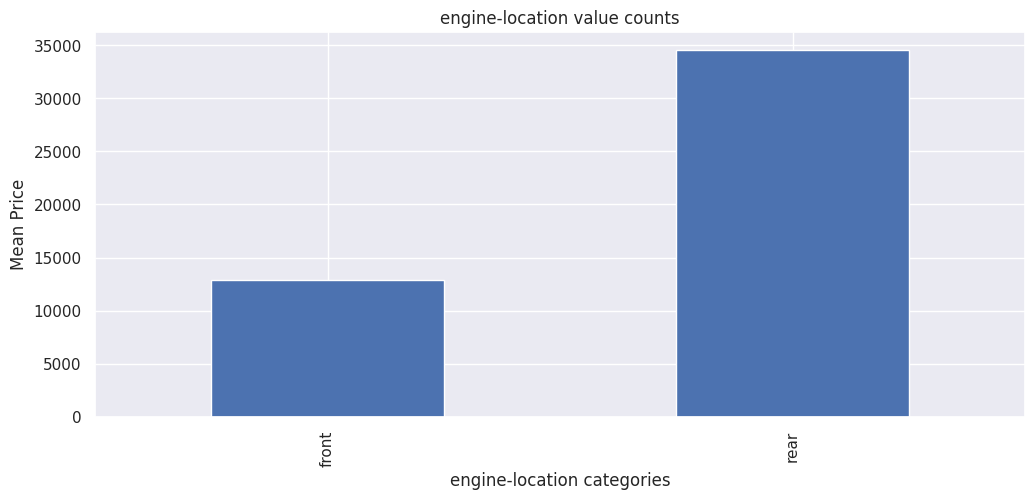

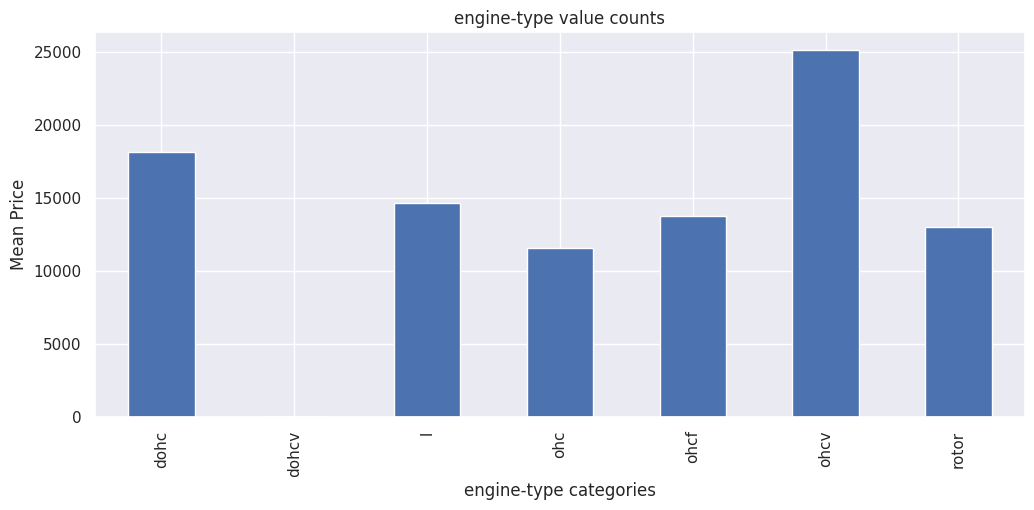

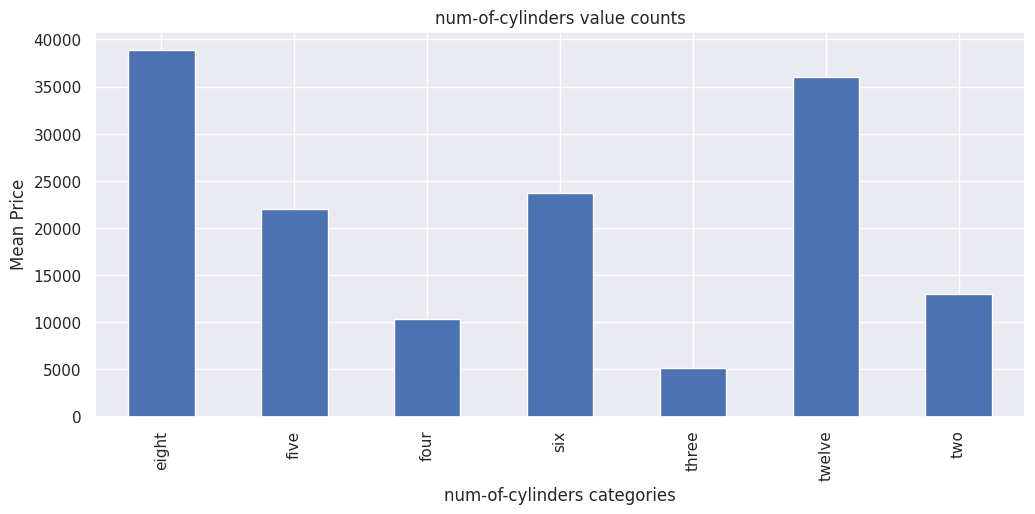

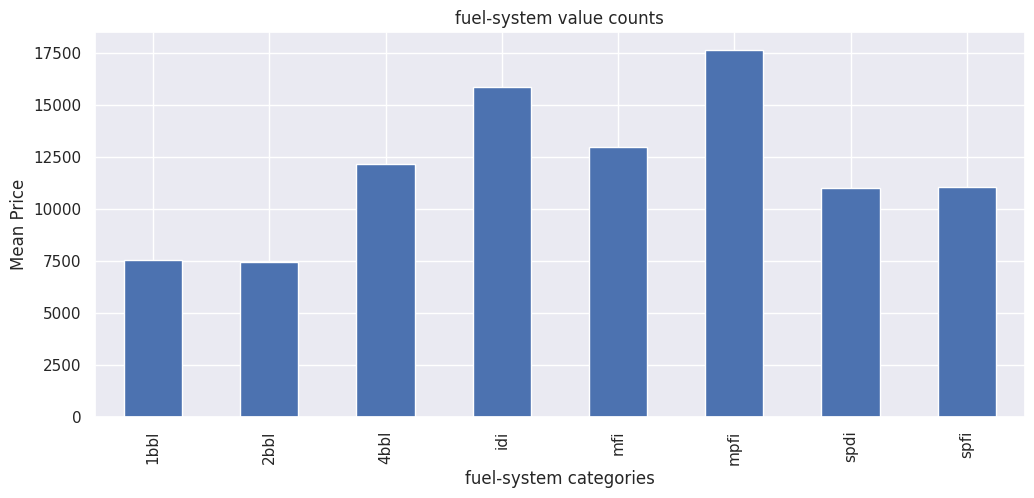

In [19]:
# relationship between categorical variables and price
for feature in cat_var:
    df=auto.copy()
    plt.figure(figsize=(12, 5))
    df.groupby(feature)['price'].mean().plot.bar()
    plt.title(feature+' value counts')
    plt.ylabel('Mean Price')
    plt.xlabel(feature+' categories')
    plt.show()

## Feature Engineering

In [20]:
# top 5 records
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Categorical Values

In [21]:
# categorical values number of unique values
for feature in [feature for feature in auto.columns if auto[feature].dtypes == 'O' or feature == 'symboling']:
    print(feature, auto[feature].nunique())

symboling 6
make 22
fuel-type 2
aspiration 2
num-of-doors 2
body-style 5
drive-wheels 3
engine-location 2
engine-type 7
num-of-cylinders 7
fuel-system 8


In [22]:
# replace categorical unique values with value counts
for feature in [feature for feature in auto.columns if auto[feature].dtypes == 'O' and feature != 'symboling']:
    # get value counts
    map_dict = df.groupby(feature)[feature].count().to_dict()
    auto[feature] = auto[feature].map(map_dict)

In [23]:
# dict for symboling variable
map_d = {3:5,  1:4,  2:3,  0:2, -1:1, -2:0}

# map the dict to the symboling variable
auto['symboling'] = auto['symboling'].map(map_d)

In [24]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,5,NaN,3,185,168,89.0,6,76,202,88.6,168.8,64.1,48.8,2548,12,159,130,94,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,5,NaN,3,185,168,89.0,6,76,202,88.6,168.8,64.1,48.8,2548,12,159,130,94,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,4,NaN,3,185,168,89.0,70,76,202,94.5,171.2,65.5,52.4,2823,13,24,152,94,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,164.0,7,185,168,114.0,96,120,202,99.8,176.6,66.2,54.3,2337,148,159,109,94,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,3,164.0,7,185,168,114.0,96,9,202,99.4,176.6,66.4,54.3,2824,148,11,136,94,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Split the dataset

In [25]:
# target and predictor variable
X = auto.drop('price', axis = 1)
y = auto['price']

# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(153, 25) (52, 25) (153,) (52,)


### Fill NaN Values

In [27]:
# fill X_train categorical varaibles with median values
for feature in ['normalized-losses', 'num-of-doors', 'peak-rpm']:
    median_v = X_test[feature].median()
    X_train[feature] = X_train[feature].fillna(median_v)

In [28]:
# fill X_test categorical varaibles with median values
X_test['normalized-losses'] = X_test['normalized-losses'].fillna(X_test['normalized-losses'].median())

In [29]:
# fill X_train numerical variable mean
for feature in ['bore', 'stroke', 'horsepower']:
    mean_v = X_test[feature].mean()
    X_train[feature] = X_train[feature].fillna(mean_v)

In [30]:
# fill X_test numerical variable mean
for feature in ['bore', 'stroke']:
    mean_v = X_test[feature].mean()
    X_test[feature] = X_test[feature].fillna(mean_v)

In [31]:
# fill y_train NaN values
y_train.fillna(y_train.median(), inplace = True)

In [32]:
# fill y_test NaN values
y_test.fillna(y_test.median(), inplace = True)

## Feature Selection

### Mutual info regression

In [33]:
# import mutual info regression
from sklearn.feature_selection import mutual_info_regression

# create an object
mi_reg = mutual_info_regression(X_train, y_train)

# convert to series
mi_reg = pd.Series(mi_reg)

# add column names
mi_reg.index = X_train.columns

# sort values from highest to lowest
mi_reg.sort_values(ascending = False)

,0
curb-weight,0.952555
highway-mpg,0.809505
horsepower,0.799924
city-mpg,0.780374
engine-size,0.730771
length,0.603797
width,0.539753
wheel-base,0.524939
fuel-system,0.382385
bore,0.366683


### Using SelectKBest

In [34]:
# import SelectKBest
from sklearn.feature_selection import SelectKBest

# create an object
skb = SelectKBest(mutual_info_regression, k=20)

skb.fit(X_train, y_train)

SelectKBest(k=20,
            score_func=<function mutual_info_regression at 0x7b23ac61e7a0>)

In [35]:
# kept features
X_train.columns[skb.get_support()]

Index(['symboling', 'normalized-losses', 'make', 'drive-wheels', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

In [36]:
# kept_features dataframe
kept_features = pd.DataFrame({'variable': X_train.columns,
                             'kept':skb.get_support()})
kept_features.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
variable,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
kept,True,True,True,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [37]:
# transform
X_train_new = skb.transform(X_train)
X_train_new

array([[4.00e+00, 1.28e+02, 1.80e+01, ..., 4.80e+03, 4.50e+01, 5.00e+01],
       [1.00e+00, 6.50e+01, 3.20e+01, ..., 4.20e+03, 2.90e+01, 3.40e+01],
       [4.00e+00, 1.03e+02, 1.80e+01, ..., 5.20e+03, 3.10e+01, 3.70e+01],
       ...,
       [4.00e+00, 1.22e+02, 1.80e+01, ..., 5.20e+03, 3.10e+01, 3.70e+01],
       [5.00e+00, 1.97e+02, 3.20e+01, ..., 5.20e+03, 1.90e+01, 2.40e+01],
       [2.00e+00, 1.08e+02, 1.80e+01, ..., 5.20e+03, 1.70e+01, 2.20e+01]])

In [38]:
# transform
X_test_new = skb.transform(X_test)
X_test_new

array([[2.00e+00, 1.15e+02, 8.00e+00, ..., 5.40e+03, 1.60e+01, 2.20e+01],
       [2.00e+00, 1.15e+02, 7.00e+00, ..., 5.50e+03, 1.60e+01, 2.20e+01],
       [2.00e+00, 1.06e+02, 1.80e+01, ..., 5.20e+03, 2.70e+01, 3.40e+01],
       ...,
       [5.00e+00, 1.45e+02, 9.00e+00, ..., 5.00e+03, 1.90e+01, 2.40e+01],
       [4.00e+00, 9.80e+01, 3.00e+00, ..., 5.40e+03, 3.80e+01, 4.30e+01],
       [5.00e+00, 1.97e+02, 3.20e+01, ..., 5.20e+03, 2.00e+01, 2.40e+01]])

## Standardisation

In [39]:
# import standardscaler
from sklearn.preprocessing import StandardScaler

sts = StandardScaler()

# X_train transformation
X_train_new = sts.fit_transform(X_train_new)
X_train_new

array([[ 0.76654355,  0.19273369,  0.4681089 , ..., -0.72908117,
         3.27147184,  3.06912659],
       [-1.54821625, -1.73240622,  2.08796233, ..., -1.95714817,
         0.66621385,  0.56388421],
       [ 0.76654355, -0.57121072,  0.4681089 , ...,  0.08963016,
         0.9918711 ,  1.03361716],
       ...,
       [ 0.76654355,  0.00938703,  0.4681089 , ...,  0.08963016,
         0.9918711 ,  1.03361716],
       [ 1.53813015,  2.30122025,  2.08796233, ...,  0.08963016,
        -0.96207239, -1.00189228],
       [-0.77662965, -0.41842184,  0.4681089 , ...,  0.08963016,
        -1.28772964, -1.31504757]])

In [40]:
# X_test transformation
X_test_new = sts.transform(X_test_new)
X_test_new

array([[-0.77662965, -0.2045174 , -0.68892926, ...,  0.49898583,
        -1.45055827, -1.31504757],
       [-0.77662965, -0.2045174 , -0.80463308, ...,  0.70366366,
        -1.45055827, -1.31504757],
       [-0.77662965, -0.47953739,  0.4681089 , ...,  0.08963016,
         0.3405566 ,  0.56388421],
       ...,
       [ 1.53813015,  0.71221588, -0.57322544, ..., -0.3197255 ,
        -0.96207239, -1.00189228],
       [ 0.76654355, -0.7239996 , -1.26744834, ...,  0.49898583,
         2.13167147,  1.97308305],
       [ 1.53813015,  2.30122025,  2.08796233, ...,  0.08963016,
        -0.79924377, -1.00189228]])

## Modelling


### Linear regression

In [41]:
# linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# training
X_train_lrr = lr.fit(X_train_new, y_train)

In [42]:
# intercept
lr.intercept_

13243.686274509802

In [43]:
# sliope
lr.coef_

array([ 1010.13608912,  -347.51938747,  -704.68847534,   -54.94378276,
        1159.05114611,    45.20911913,  -824.41079177,   128.32291199,
        1263.62134866,  1428.26166694, -1763.0457219 ,  4651.53896356,
         391.5768492 ,   820.45183592, -1154.27567859,  1202.88772423,
        -859.57787708,  1336.52278064,  -119.90999239, -1240.50688421])

In [44]:
coef_ser = pd.Series(lr.coef_)
coef_ser

,0
0,1010.136089
1,-347.519387
2,-704.688475
3,-54.943783
4,1159.051146
5,45.209119
6,-824.410792
7,128.322912
8,1263.621349
9,1428.261667


In [45]:
coef = pd.DataFrame({'Variable':X_train.columns[skb.get_support()],
                     'coefficeint':coef_ser})
coef

,Variable,coefficeint
0,symboling,1010.136089
1,normalized-losses,-347.519387
2,make,-704.688475
3,drive-wheels,-54.943783
4,wheel-base,1159.051146
5,length,45.209119
6,width,-824.410792
7,height,128.322912
8,curb-weight,1263.621349
9,engine-type,1428.261667


In [46]:
y_pred_lrr = lr.predict(X_test_new)

In [47]:
results = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred_lrr})
results.head()

,Actual Value,Predicted Value
15,30760.0,29695.734275
9,9799.5,18527.528504
100,9549.0,9120.821645
132,11850.0,16864.922312
68,28248.0,27992.956184


In [48]:
# import metrics evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# metric calculation
lr_mae = mean_absolute_error(y_test, y_pred_lrr)
lr_mse = mean_squared_error(y_test, y_pred_lrr)
lr_rmse = np.sqrt(lr_mse)

In [49]:
print(f'Mean absolute error: {lr_mae: 2f}')
print(f'Mean squared error: {lr_mse: 2f}')
print(f'Root Mean squared error: {lr_rmse: 2f}')

Mean absolute error:  2366.640808
Mean squared error:  12326591.130031
Root Mean squared error:  3510.924541


In [50]:
lr.score(X_test_new, y_test)

0.8167389801760312

In [51]:
# Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
# p = independent variables, n= sample size

#Adj_r2 = 1-(1-R2)*(16-1)/(16-15-1)
#Adj_r2

In [52]:
lr.score(X_train_new, y_train)

0.8527204309093488

In [53]:
### Linear regression performs well

### Linear regression performs well

### Lasso Regression

In [54]:
from sklearn.feature_selection import SelectFromModel

In [55]:
from sklearn.linear_model import Lasso

las = Lasso(alpha = 0.1)

las.fit(X_train, y_train)

Lasso(alpha=0.1)

In [56]:
y_pred_las = las.predict(X_test)
y_pred_las

array([26262.94781891, 20400.06747755,  8925.02637305, 14898.74607867,
       27526.04647298,  7284.04848248,  5619.30184399,  7126.07544115,
        9465.46403117,  6861.39369342, 19353.21486311,  7769.68857949,
       15172.11638077,  7679.79589895, 40346.15003496,  6006.60141808,
         647.62843208, 15331.95327042, 11322.89535523,  9845.74239529,
       10482.21635577, 20506.02058313,  5677.68998659,  -673.47880382,
        7555.78946399, 27339.5639637 , 11297.28705502, 17307.47937773,
        6611.76769972, 17317.86350982, 27744.11891507,  7149.95808799,
        6739.50148248, 24140.89385542,  8465.12256722, 26665.12144755,
       11706.33476622,  9427.2336735 ,  6006.04088635, 15740.06646988,
        7916.57156111, 11392.63066577, 17683.96841614,  5407.28490015,
        7173.10432471,  8674.36069386,  7078.87538798,  7520.8467538 ,
       16346.30177167, 15020.78214091,  6732.0004269 , 18470.14200722])

In [57]:
# import metrics evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error


las_mae = mean_absolute_error(y_test, y_pred_las)
las_mse = mean_squared_error(y_test, y_pred_las)
las_rmse = np.sqrt(las_mse)

In [58]:
print(f'Mean absolute error: {las_mae: 2f}')
print(f'Mean squared error: {las_mse: 2f}')
print(f'Root Mean squared error: {las_rmse: 2f}')

Mean absolute error:  2472.828168
Mean squared error:  13264015.310600
Root Mean squared error:  3641.979587


In [59]:
# Testing R-square score
las.score(X_test, y_test)

0.8028021740042018

In [60]:
# Training R-Square score
las.score(X_train, y_train)

0.8969697281756209

In [61]:
results = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred_las})
results.head()

,Actual Value,Predicted Value
15,30760.0,26262.947819
9,9799.5,20400.067478
100,9549.0,8925.026373
132,11850.0,14898.746079
68,28248.0,27526.046473


In [65]:
# Creating a DataFrame to compare both models
comparison_df = pd.DataFrame({
    'model': ['Linear Regression', 'Lasso Regression'],
    'mse': [lr_mse, las_mse],
    'mae': [lr_mae, las_mae],
    'rmse': [lr_rmse, las_rmse]})

print(comparison_df)

               model           mse          mae         rmse
0  Linear Regression  1.232659e+07  2366.640808  3510.924541
1   Lasso Regression  1.326402e+07  2472.828168  3641.979587


### **Saving Model**

In [70]:
import joblib

# Assuming you've already trained a model, e.g., linear_model or lasso_model
joblib.dump(lr, 'Automobile_linear_model.pkl')   # Save linear regression model
joblib.dump(las, 'Automobile_lasso_model.pkl')     # Save lasso regression model


['Automobile_lasso_model.pkl']